# LEAD SCORING CASE STUDY

## Problem Statement

An **education company** named X Education **sells online courses** to industry professionals. On any given day, many professionals who are interested in the courses land on their **website** and **browse for courses**. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might 
1. browse the courses or
2. fill up a form for the course or
3. watch some videos.

When these people **fill up a form providing their email address or phone number**, they are classified to be a **lead**. Moreover, the company also gets **leads through past referrals**. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical **lead conversion rate at X education is around 30%**. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 

To make this process more efficient, the company wishes to **identify the most potential leads**, also known as **‘Hot Leads’**. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

A typical lead conversion process can be represented using the following **funnel**:

In [3]:
from IPython.display import Image 
Image(url=r"C:\Users\Niharika\OneDrive\Pictures\Screenshots\Screenshot 2025-01-12 112845.png", width=300, height=100)

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. 

In the middle stage, you need to **nurture the potential leads** well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them **select the most promising leads**, i.e. the leads that are most likely to convert into paying customers. The company requires you to **build a model** wherein you need to **assign a lead score** to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the **target lead conversion rate to be around 80%**.

**Data**: Leads dataset with around 9000 data points.

**Target variable**: column ‘Converted’ wherein 1 means past lead was converted and 0 means it wasn’t converted. 

## Goals of the Case Study

1. Build a **logistic regression model** to assign a **lead score between 0 and 100 to each of the leads** which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are **some more problems presented by the company** which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step.

In [9]:
# Load the libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Setting display options
pd.set_option("display.max_columns",None)

# Enabling display of float values upto 2 decimal points
pd.options.display.float_format="{:,.3f}".format

In [12]:
# Importing dataset
lead_data = pd.read_csv(r"C:\Users\Niharika\Downloads\Lead+Scoring+Case+StudyLogisticReg\Lead Scoring Assignment\Leads_LogReg.csv")
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0        0.000   
1  Organic Search           No          No          0        5.000   
2  Direct Traffic           No          No          1        2.000   
3  Direct Traffic           No          No          0        1.000   
4          Google           No          No          1        2.000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                 0.000  Page Visited on Website   
1                          674                 2.500             Email Opened   
2                         1532                 2.000             Email Opened   
3                          305                 1.000              Unreachable   
4                         1428                 1.000        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

## Column Dictionary

 - Prospect ID:	A unique ID with which the customer is identified.
 - Lead Number:	A lead number assigned to each lead procured.
 - Lead Origin:	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
 - Lead Source:	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
 - Do Not Email:	An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
 - Do Not Call:	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
 - Converted:	The target variable. Indicates whether a lead has been successfully converted or not.
 - TotalVisits": The total number of visits made by the customer on the website.
 - Total Time Spent on Website:	The total time spent by the customer on the website.
 - Page Views Per Visit: Average number of pages on the website viewed during the visits.
 - Last Activity: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
 - Country:	The country of the customer.
 - Specialization:	The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
 - How did you hear about X Education:	The source from which the customer heard about X Education.
 - What is your current occupation:	Indicates whether the customer is a student, umemployed or employed.
 - What matters most to you in choosing this course: An option selected by the customer indicating what is their main motto behind doing this course.
 - Search: Indicating whether the customer had seen the ad in any of the listed items like google search.
 - Magazine: Indicating whether the customer had seen the ad in any of the listed items like magazine.	
 - Newspaper Article: Indicating whether the customer had seen the ad in any of the listed items like newspaper article.	
 - X Education Forums: Indicating whether the customer had seen the ad in any of the listed items like X Education Forums.	
 - Newspaper: Indicating whether the customer had seen the ad in any of the listed items like Newspaper.	
 - Digital Advertisement: Indicating whether the customer had seen the ad in any of the listed items like Digital Advertisement.	
 - Through Recommendations:	Indicates whether the customer came in through recommendations.
 - Receive More Updates About Our Courses: Indicates whether the customer chose to receive more updates about the courses.
 - Tags: Tags assigned to customers indicating the current status of the lead.
 - Lead Quality: Indicates the quality of lead based on the data and intuition of the employee who has been assigned to the lead.
 - Update me on Supply Chain Content: Indicates whether the customer wants updates on the Supply Chain Content.
 - Get updates on DM Content: Indicates whether the customer wants updates on the DM Content.
 - Lead Profile: A lead level assigned to each customer based on their profile.
 - City: The city of the customer.
 - Asymmetrique Activity Index:	An index assigned to each customer based on their activity.
 - Asymmetrique Profile Index: An index assigned to each customer based on their profile.	
 - Asymmetrique Activity Score: A score assigned to each customer based on their activity.	
 - Asymmetrique Profile Score: An score assigned to each customer based on their profile.	
 - I agree to pay the amount through cheque: Indicates whether the customer has agreed to pay the amount through cheque or not.
 - A free copy of Mastering The Interview: Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
 - Last Notable Activity: The last notable acitivity performed by the student.

In [15]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [16]:
# Inspecting the descriptive statistics of the dataframe
lead_data.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count    9,240.000  9,240.000    9,103.000                    9,240.000   
mean   617,188.436      0.385        3.445                      487.698   
std     23,405.996      0.487        4.855                      548.021   
min    579,533.000      0.000        0.000                        0.000   
25%    596,484.500      0.000        1.000                       12.000   
50%    615,479.000      0.000        3.000                      248.000   
75%    637,387.250      1.000        5.000                      936.000   
max    660,737.000      1.000      251.000                    2,272.000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count             9,103.000                    5,022.000   
mean                  2.363                       14.306   
std                   2.161                        1.387   
min                   0.000                        7.000   
25%                   1.000                       14.000   
50%                   2.000                       14.000   
75%                   3.000                       15.000   
max                  55.000                       18.000   

       Asymmetrique Profile Score  
count                   5,022.000  
mean                       16.345  
std                         1.811  
min                        11.000  
25%                        15.000  
50%                        16.000  
75%                        18.000  
max                        20.000

In [17]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Cleaning the data

In [19]:
# Checking Null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [20]:
# Checking % of Null values
(lead_data.isnull().sum()*100/lead_data.shape[0]).sort_values(ascending=False)

Lead Quality                                    51.591
Asymmetrique Activity Index                     45.649
Asymmetrique Profile Score                      45.649
Asymmetrique Activity Score                     45.649
Asymmetrique Profile Index                      45.649
Tags                                            36.288
Lead Profile                                    29.318
What matters most to you in choosing a course   29.318
What is your current occupation                 29.113
Country                                         26.634
How did you hear about X Education              23.885
Specialization                                  15.563
City                                            15.368
Page Views Per Visit                             1.483
TotalVisits                                      1.483
Last Activity                                    1.115
Lead Source                                      0.390
Receive More Updates About Our Courses           0.000
I agree to

<html><mark><b>17 columns in the dataset seem to have null values</b></mark></html>

In [22]:
# Remove duplicates (if any are present in the dataset)
lead_data.drop_duplicates(inplace = True)
lead_data.shape

(9240, 37)

<html><mark><b>There are no duplicate values in the data</b></mark></html>

## Categorical and Numerical features

In [25]:
# Categorical column list: Object dtype

categorical_features=[i for i in lead_data.columns if lead_data[i].dtype=="O"]
print(len(categorical_features))
print(categorical_features)

30
['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [26]:
# Iterating over all the categorical columns to print the unique values in each column
for col in categorical_features:
    print(f"Unique values in {col} are: {lead_data[col].unique()}\n")

Unique values in Prospect ID are: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

Unique values in Lead Origin are: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Unique values in Lead Source are: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

Unique values in Do Not Email are: ['No' 'Yes']

Unique values in Do Not Call are: ['No' 'Yes']

Unique values in Last Activity are: ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form

In [27]:
# Numerical column list: Int / Float dtype

numerical_features=[i for i in lead_data.columns if lead_data[i].dtype!="O"]
print(len(numerical_features))
print(numerical_features)

7
['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


<html><mark><b>Many columns seem to have 'Select' in their list of unique values which indicates that no selection of options was made by user during filling of forms and is thus, equivalent to null value.</b></mark></html>

### Handling Null Values

In [30]:
# Dropping columns with null values more than 35%

lead_data.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Tags'], axis=1, inplace=True)
lead_data.shape

(9240, 31)

In [31]:
# Checking unique values in the Prospect ID and Lead Number column

print("Unique values in Prospect ID", lead_data['Prospect ID'].nunique())
print("Unique values in Lead Number", lead_data['Lead Number'].nunique())

Unique values in Prospect ID 9240
Unique values in Lead Number 9240


<html><mark><b>As both the Prospect ID and Lead Number seem to have a unique value for each row of the data, we can drop Lead Number column as it is not providing any useful information for building the model</b></mark></html>

In [33]:
# Dropping Lead Number column

lead_data.drop(['Lead Number'], axis=1, inplace=True)
lead_data.shape

(9240, 30)

In [34]:
# Replacing 'Select' with NaN values as it indicates that no selection was made by the user
lead_data.replace({'Select':np.nan}, inplace=True)
lead_data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0        0.000   
1  Organic Search           No          No          0        5.000   
2  Direct Traffic           No          No          1        2.000   
3  Direct Traffic           No          No          0        1.000   
4          Google           No          No          1        2.000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                 0.000  Page Visited on Website   
1                          674                 2.500             Email Opened   
2                         1532                 2.000             Email Opened   
3                          305                 1.000              Unreachable   
4                         1428                 1.000        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No             NaN   
1                                No                        No             NaN   
2                                No                        No  Potential Lead   
3                                No                        No             NaN   
4                                No                        No             NaN   

     City I agree to pay the amount through cheque  \
0     NaN                                       No   
1     NaN                                       No   
2  Mumbai                                       No   
3  Mumbai                                       No   
4  Mumbai                          

In [35]:
# Checking the dataframe for columns with only 1 unique value as those columns will only convey limited information about the users
lead_data.nunique()

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [36]:
# Function to identify columns with 1 unique value
cols_no_unique=[]
for i in lead_data.columns:
    if lead_data[i].nunique()==1:
        cols_no_unique.append(i)
print(cols_no_unique)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [37]:
# Dropping columns with only 1 unique value

lead_data.drop(cols_no_unique, axis=1, inplace=True)
lead_data.shape

(9240, 25)

In [38]:
# Rechecking % of Null values after replacing select with NaN values
(lead_data.isnull().sum()*100/lead_data.shape[0]).sort_values(ascending=False)

How did you hear about X Education              78.463
Lead Profile                                    74.188
City                                            39.708
Specialization                                  36.580
What matters most to you in choosing a course   29.318
What is your current occupation                 29.113
Country                                         26.634
TotalVisits                                      1.483
Page Views Per Visit                             1.483
Last Activity                                    1.115
Lead Source                                      0.390
X Education Forums                               0.000
A free copy of Mastering The Interview           0.000
Through Recommendations                          0.000
Digital Advertisement                            0.000
Newspaper                                        0.000
Prospect ID                                      0.000
Newspaper Article                                0.000
Search    

## Handling Null Values

### Analysing columns with more than 0% null values

**1. How did you hear about X Education**

In [42]:
# Analysing columns with more than 30% null values: How did you hear about X Education

(lead_data['How did you hear about X Education'].value_counts(dropna=False)*100)/len(lead_data)

How did you hear about X Education
NaN                     78.463
Online Search            8.745
Word Of Mouth            3.766
Student of SomeSchool    3.355
Other                    2.013
Multiple Sources         1.645
Advertisements           0.758
Social Media             0.725
Email                    0.281
SMS                      0.249
Name: count, dtype: float64

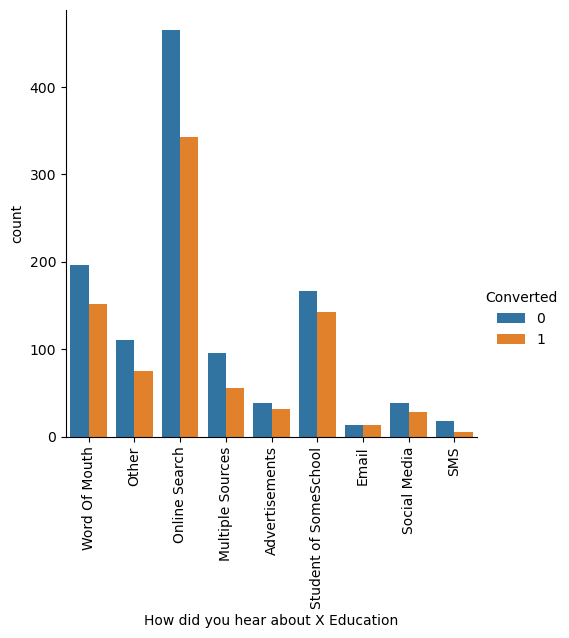

In [43]:
sns.catplot(data=lead_data, x='How did you hear about X Education', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

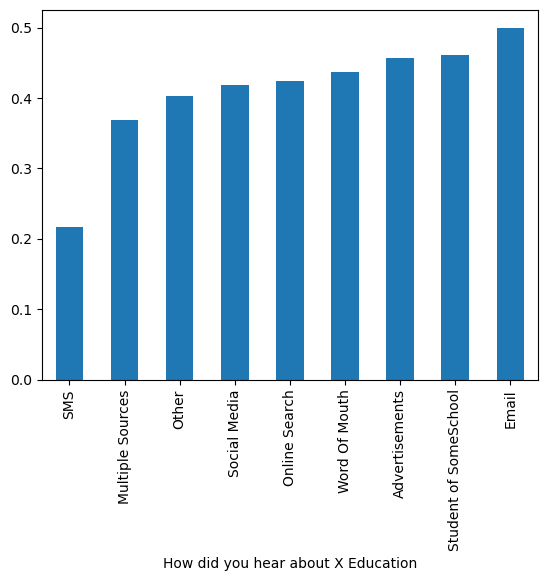

In [44]:
lead_data.groupby(['How did you hear about X Education'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<html><mark><b>As 'How did you hear about X Education' column seems to have 78.46% null values, this column seems to be quite unbalanced. So it would be better to delete it</b></mark></html>

In [46]:
# Dropping How did you hear about X Education column

lead_data.drop(['How did you hear about X Education'], axis=1, inplace=True)
lead_data.shape

(9240, 24)

**2. Lead Profile**

In [48]:
# Analysing columns with more than 30% null values: Lead Profile

(lead_data['Lead Profile'].value_counts(dropna=False)*100)/len(lead_data)

Lead Profile
NaN                           74.188
Potential Lead                17.457
Other Leads                    5.271
Student of SomeSchool          2.608
Lateral Student                0.260
Dual Specialization Student    0.216
Name: count, dtype: float64

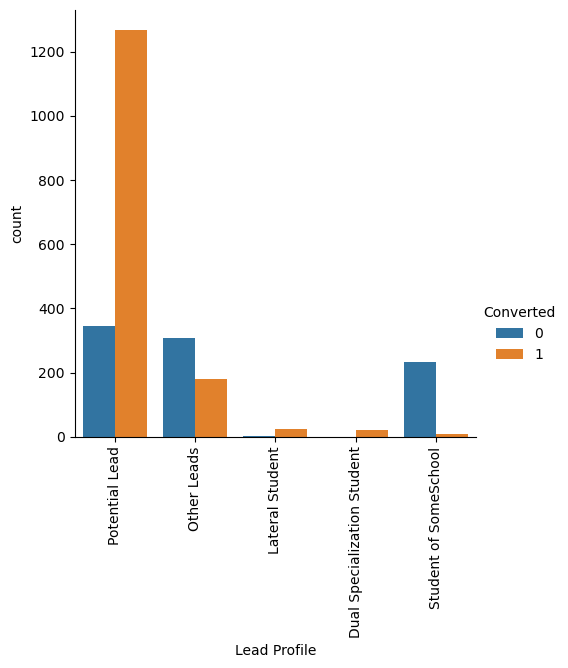

In [49]:
sns.catplot(data=lead_data, x='Lead Profile', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()
# Users classified as Potential Lead seem to have significantly higher conversion rate than other categories

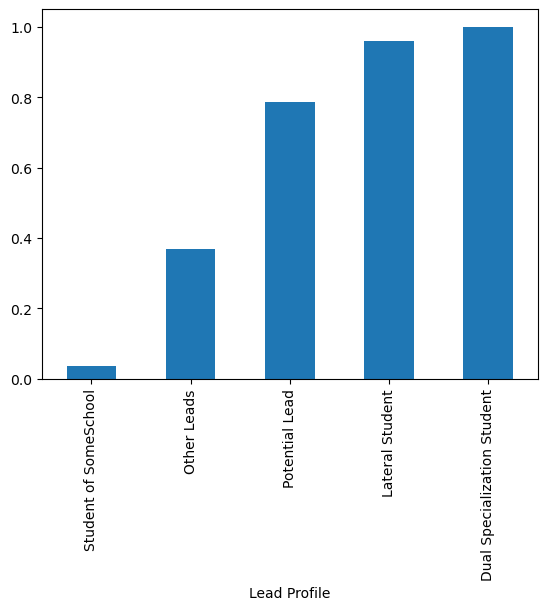

In [50]:
lead_data.groupby(['Lead Profile'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<html><mark><b>As 'Lead Profile' column seems to have 74.19% null values, this column seems to be quite unbalanced. So it would be better to delete it</b></mark></html>

In [52]:
# Dropping Lead Profile column

lead_data.drop(['Lead Profile'], axis=1, inplace=True)
lead_data.shape

(9240, 23)

**3. City**

In [54]:
# Analysing columns with more than 30% null values: City

(lead_data['City'].value_counts(dropna=False)*100)/len(lead_data)

City
NaN                           39.708
Mumbai                        34.870
Thane & Outskirts              8.139
Other Cities                   7.424
Other Cities of Maharashtra    4.946
Other Metro Cities             4.113
Tier II Cities                 0.801
Name: count, dtype: float64

In [55]:
lead_data['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

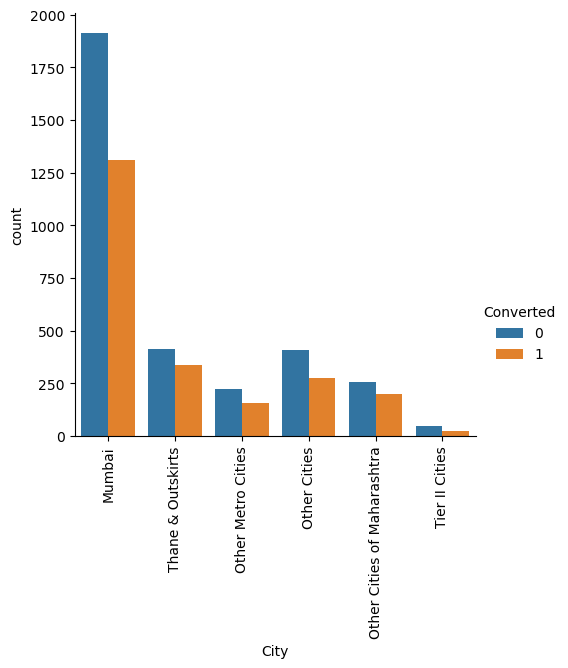

In [56]:
# Plotting count of converted vs. unconverted leads by cities  
sns.catplot(data=lead_data, x='City', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

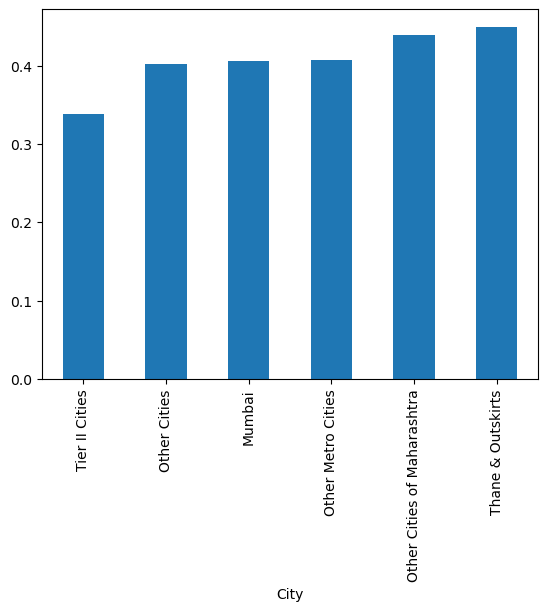

In [57]:
lead_data.groupby(['City'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<html><mark><b>'City' column seems to have 39.71% null values while 34.87% users are from mumbai, 8.14% are from Thane and outskirts and 4.95% are from other cities of Maharashtra. Combined together, about 47.96% users seem to belong to various cities of Maharashtra, Mumbai being the dominant city</b></mark></html>

<html><mark><b>As about 50% of users seem to belong to various cities of Maharashtra, with column having about 40% null values, the column seems to be having limited informtion about the users. Imputing the missing values with the mode will lead to disproportionate emphasis being given to Mumbai so we can impute the null values with 'Missing' value.</b></mark></html>

In [60]:
lead_data['City'].replace(np.nan, 'Missing', inplace=True)
lead_data['City'].value_counts(dropna=False)

City
Missing                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [61]:
(lead_data['City'].value_counts(dropna=False)*100)/len(lead_data)

City
Missing                       39.708
Mumbai                        34.870
Thane & Outskirts              8.139
Other Cities                   7.424
Other Cities of Maharashtra    4.946
Other Metro Cities             4.113
Tier II Cities                 0.801
Name: count, dtype: float64

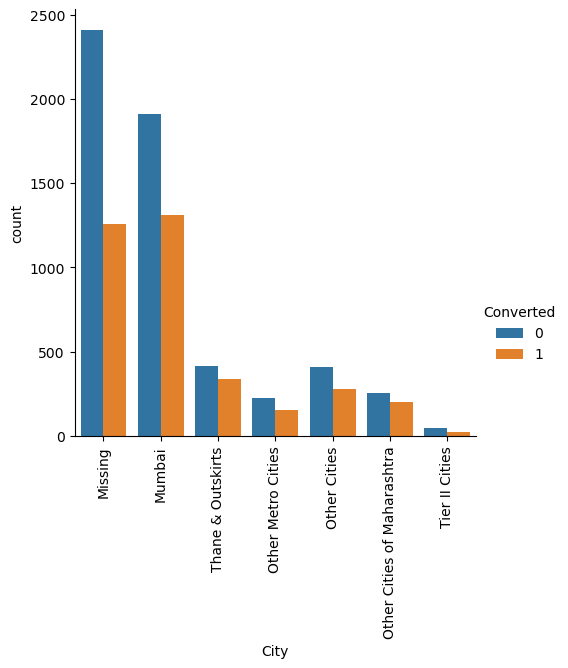

In [62]:
# Replotting the graph with new counts of the column
sns.catplot(data=lead_data, x='City', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

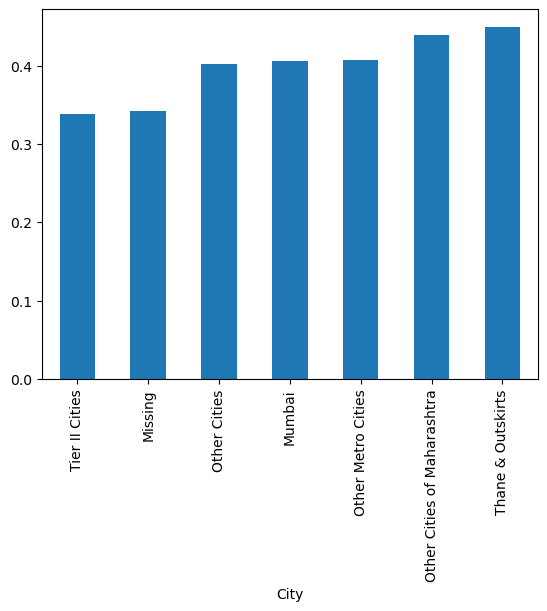

In [63]:
lead_data.groupby(['City'])['Converted'].mean().sort_values().plot.bar()
plt.show()

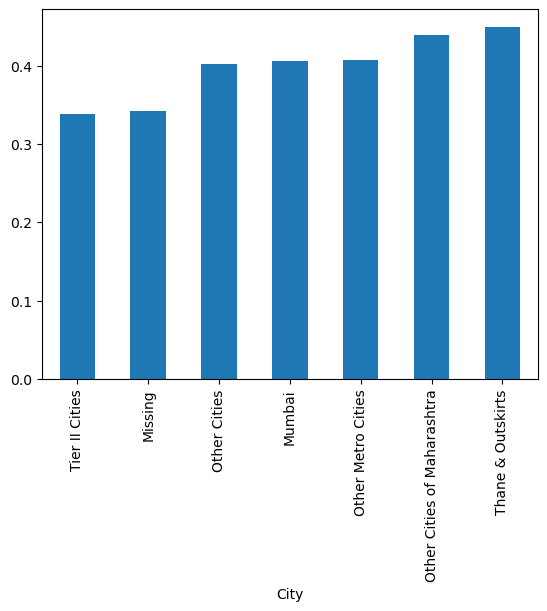

In [64]:
lead_data.groupby(['City'])['Converted'].mean().sort_values().plot.bar()
plt.show()

**4. Specialization**

In [66]:
# Analysing columns with more than 30% null values: Specialization

(lead_data['Specialization'].value_counts(dropna=False)*100)/len(lead_data)

Specialization
NaN                                 36.580
Finance Management                  10.563
Human Resource Management            9.177
Marketing Management                 9.069
Operations Management                5.444
Business Administration              4.361
IT Projects Management               3.961
Supply Chain Management              3.777
Banking, Investment And Insurance    3.658
Travel and Tourism                   2.197
Media and Advertising                2.197
International Business               1.926
Healthcare Management                1.721
Hospitality Management               1.234
E-COMMERCE                           1.212
Retail Management                    1.082
Rural and Agribusiness               0.790
E-Business                           0.617
Services Excellence                  0.433
Name: count, dtype: float64

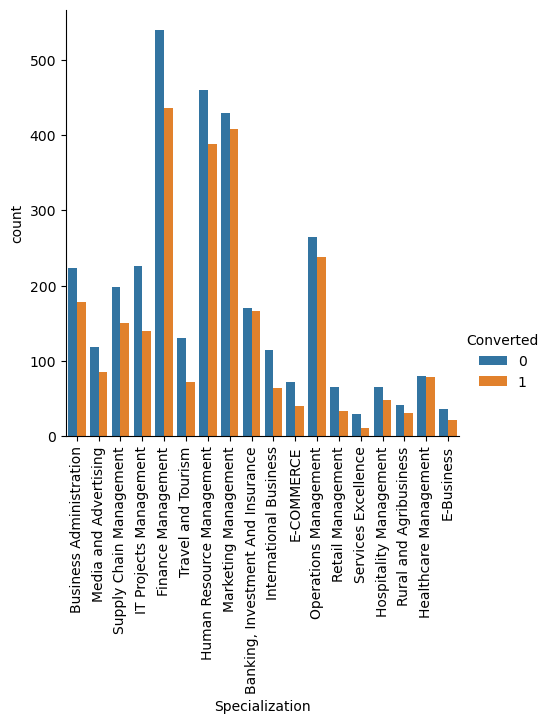

In [67]:
# Plotting count of converted vs. unconverted leads by Specialization  
sns.catplot(data=lead_data, x='Specialization', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

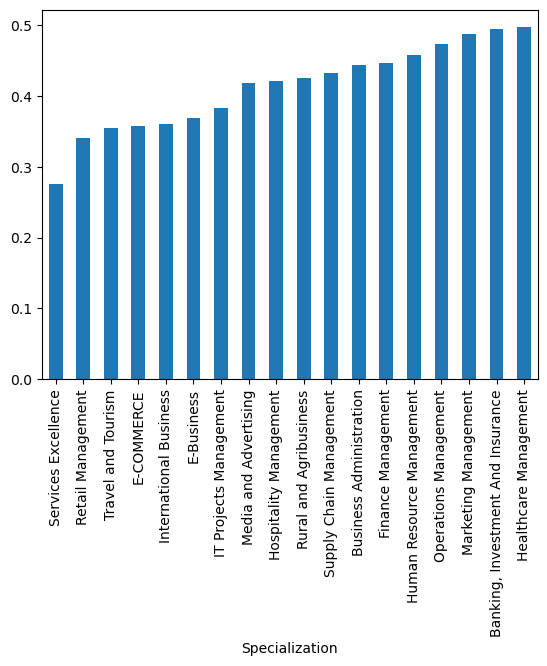

In [68]:
lead_data.groupby(['Specialization'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<html><mark><b>'Specialization' column seems to have 36.581% null values while rest of users are from multiple specializations with Finance Management and Human Resource Management being the largest categories. Imputing the missing values with the mode will lead to disproportionate emphasis being given to Finance Management so we can impute the null value with 'Missing' value</b></mark></html>

In [70]:
lead_data['Specialization'].replace(np.nan, 'Missing', inplace=True)
(lead_data['Specialization'].value_counts(dropna=False)*100)/len(lead_data)

Specialization
Missing                             36.580
Finance Management                  10.563
Human Resource Management            9.177
Marketing Management                 9.069
Operations Management                5.444
Business Administration              4.361
IT Projects Management               3.961
Supply Chain Management              3.777
Banking, Investment And Insurance    3.658
Travel and Tourism                   2.197
Media and Advertising                2.197
International Business               1.926
Healthcare Management                1.721
Hospitality Management               1.234
E-COMMERCE                           1.212
Retail Management                    1.082
Rural and Agribusiness               0.790
E-Business                           0.617
Services Excellence                  0.433
Name: count, dtype: float64

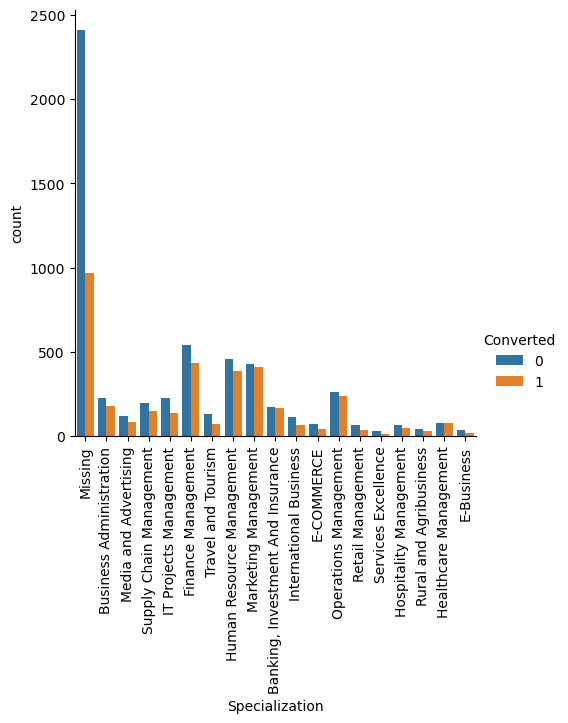

In [71]:
# Replotting the graph with new counts of the column
sns.catplot(data=lead_data, x='Specialization', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

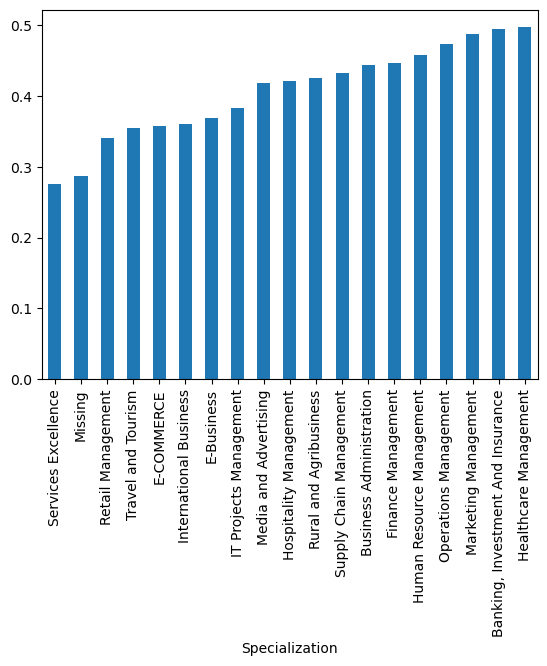

In [72]:
lead_data.groupby(['Specialization'])['Converted'].mean().sort_values().plot.bar()
plt.show()

### Analysing columns with more than 20% null values

**5. What matters most to you in choosing a course**

In [75]:
# Analysing columns with more than 20% null values: What matters most to you in choosing a course

(lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)*100)/len(lead_data)

What matters most to you in choosing a course
Better Career Prospects     70.649
NaN                         29.318
Flexibility & Convenience    0.022
Other                        0.011
Name: count, dtype: float64

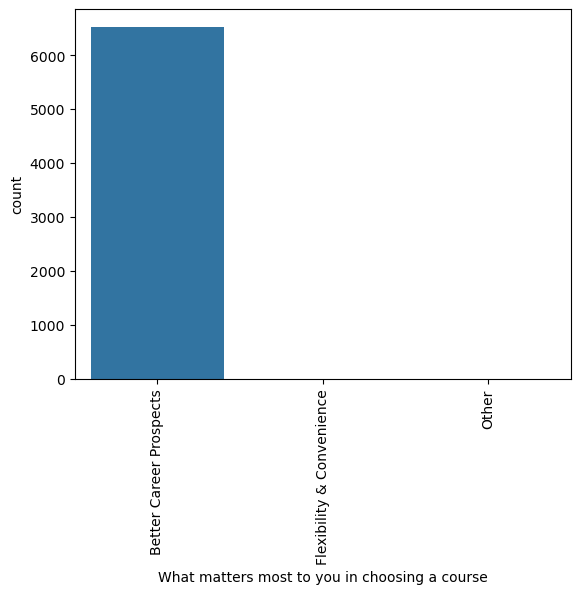

In [76]:
# Plotting count of leads by What matters most to you in choosing a course  
sns.countplot(data=lead_data, x='What matters most to you in choosing a course')
plt.xticks(rotation=90)
plt.show()

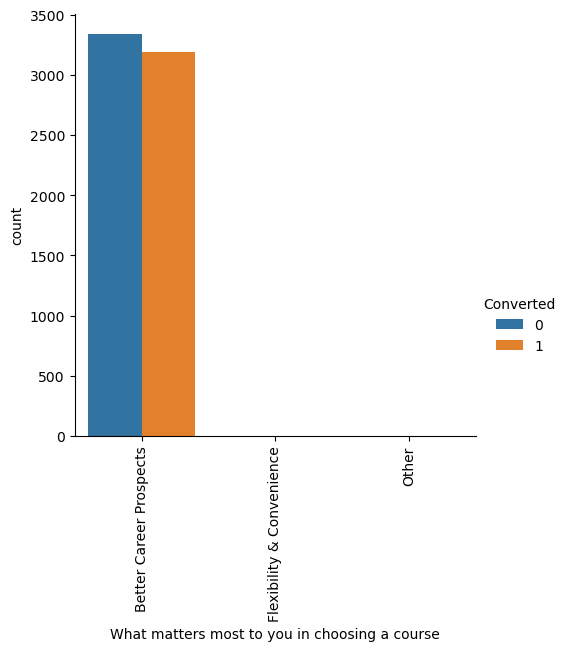

In [77]:
# Plotting count of converted vs. unconverted leads by What matters most to you in choosing a course  
sns.catplot(data=lead_data, x='What matters most to you in choosing a course', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

<html><mark><b>As 'What matters most to you in choosing a course' column seems to have 29.32% null values with 70.65% users choosing 'Better Career Prospects' option, this column seems to be quite unbalanced and limited in variability. So it would be better to delete it</b></mark></html>

In [79]:
# Dropping 'What matters most to you in choosing a course' column

lead_data.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)
lead_data.shape

(9240, 22)

**6. What is your current occupation**

In [81]:
# Analysing columns with more than 20% null values: What is your current occupation

(lead_data['What is your current occupation'].value_counts(dropna=False)*100)/len(lead_data)

What is your current occupation
Unemployed             60.606
NaN                    29.113
Working Professional    7.641
Student                 2.273
Other                   0.173
Housewife               0.108
Businessman             0.087
Name: count, dtype: float64

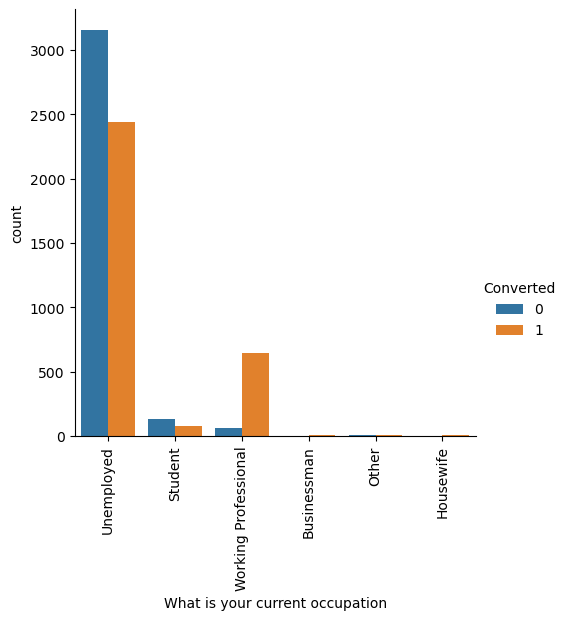

In [82]:
# Plotting count of converted vs. unconverted leads by What is your current occupation  
sns.catplot(data=lead_data, x='What is your current occupation', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

<html><mark><b>'What is your current occupation' column seems to have 29.11% null values while 60.61% of users are Unemployed. Imputing the missing values with the mode will lead to disproportionate emphasis being given to Unemployed, so we can impute the null values with 'Missing' value.</b></mark></html>

In [84]:
lead_data['What is your current occupation'].replace(np.nan, 'Missing', inplace=True)
(lead_data['What is your current occupation'].value_counts(dropna=False)*100)/len(lead_data)

What is your current occupation
Unemployed             60.606
Missing                29.113
Working Professional    7.641
Student                 2.273
Other                   0.173
Housewife               0.108
Businessman             0.087
Name: count, dtype: float64

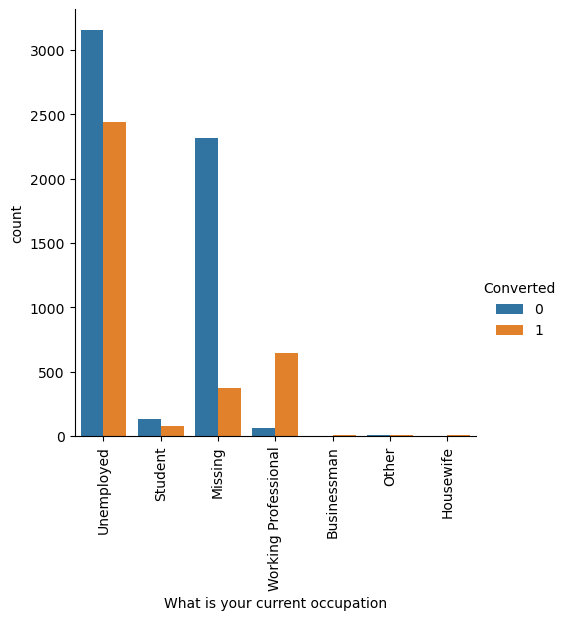

In [85]:
# Replotting the graph with new counts of the column
sns.catplot(data=lead_data, x='What is your current occupation', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

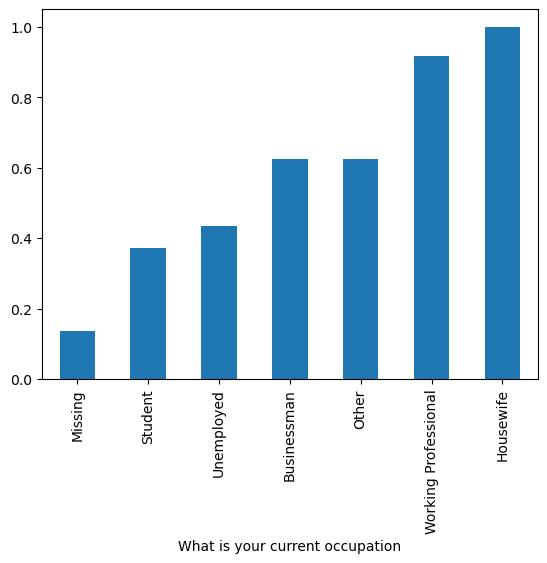

In [86]:
lead_data.groupby(['What is your current occupation'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<html><mark><b> In'What is your current occupation' column though Unemployed is the largest category of users, the proportion of user conversion seems to be much higher in the users who are either Housewives or Working Professionals.</b></mark></html>

**7. Country**

In [89]:
# Analysing columns with more than 20% null values

(lead_data['Country'].value_counts(dropna=False)*100)/len(lead_data)

Country
India                  70.260
NaN                    26.634
United States           0.747
United Arab Emirates    0.574
Singapore               0.260
Saudi Arabia            0.227
United Kingdom          0.162
Australia               0.141
Qatar                   0.108
Bahrain                 0.076
Hong Kong               0.076
Oman                    0.065
France                  0.065
unknown                 0.054
Kuwait                  0.043
South Africa            0.043
Canada                  0.043
Nigeria                 0.043
Germany                 0.043
Sweden                  0.032
Philippines             0.022
Uganda                  0.022
Italy                   0.022
Bangladesh              0.022
Netherlands             0.022
Asia/Pacific Region     0.022
China                   0.022
Belgium                 0.022
Ghana                   0.022
Kenya                   0.011
Sri Lanka               0.011
Tanzania                0.011
Malaysia                0.011
Li

In [90]:
# Replacing the unknown value with NaN values
lead_data['Country'].replace('unknown', np.nan, inplace=True)
(lead_data['Country'].value_counts(dropna=False)*100)/len(lead_data)

Country
India                  70.260
NaN                    26.688
United States           0.747
United Arab Emirates    0.574
Singapore               0.260
Saudi Arabia            0.227
United Kingdom          0.162
Australia               0.141
Qatar                   0.108
Bahrain                 0.076
Hong Kong               0.076
Oman                    0.065
France                  0.065
Kuwait                  0.043
South Africa            0.043
Canada                  0.043
Nigeria                 0.043
Germany                 0.043
Sweden                  0.032
Philippines             0.022
Asia/Pacific Region     0.022
Italy                   0.022
Uganda                  0.022
Bangladesh              0.022
Netherlands             0.022
China                   0.022
Belgium                 0.022
Ghana                   0.022
Kenya                   0.011
Sri Lanka               0.011
Tanzania                0.011
Malaysia                0.011
Liberia                 0.011
Sw

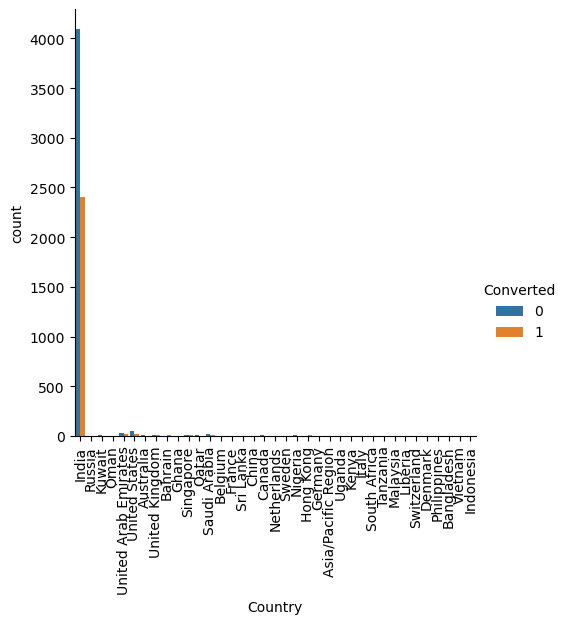

In [91]:
# Plotting count of converted vs. unconverted leads by Country
sns.catplot(data=lead_data, x='Country', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

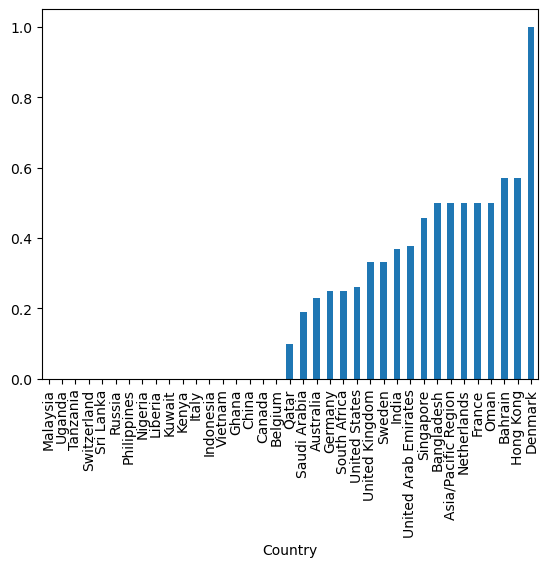

In [92]:
lead_data.groupby(['Country'])['Converted'].mean().sort_values().plot.bar()
plt.show()
# Users from Denmark seem to seem showing a high degree of conversion rate

<html><mark><b>'Country' column seems to have 26.63% null values and 70.26% of the rest of the users are Indians. So the balance users besides those with null values or India option make up only 3.11% of the category. Even within this column, 0.054% values are 'unknown'. As this column seems to be quite unbalanced and limited in variability, so it would be better to delete it</b></mark></html>

In [94]:
# Dropping 'Country' column

lead_data.drop(['Country'], axis=1, inplace=True)
lead_data.shape

(9240, 21)

In [95]:
# Rechecking % of Null values
(lead_data.isnull().sum()*100/lead_data.shape[0]).sort_values(ascending=False)

TotalVisits                              1.483
Page Views Per Visit                     1.483
Last Activity                            1.115
Lead Source                              0.390
Prospect ID                              0.000
Newspaper Article                        0.000
A free copy of Mastering The Interview   0.000
City                                     0.000
Through Recommendations                  0.000
Digital Advertisement                    0.000
Newspaper                                0.000
X Education Forums                       0.000
Specialization                           0.000
Search                                   0.000
What is your current occupation          0.000
Lead Origin                              0.000
Total Time Spent on Website              0.000
Converted                                0.000
Do Not Call                              0.000
Do Not Email                             0.000
Last Notable Activity                    0.000
dtype: float6

<html><mark><b>As now only 4 columns less than 1.5% null values, we can drop those rows.</b></mark></html>

In [97]:
# Dropping balance null values from the dataframe
lead_data1 = lead_data.dropna()

In [98]:
# Rechecking % of Null values
(lead_data1.isnull().sum()*100/lead_data1.shape[0]).sort_values(ascending=False)

Prospect ID                              0.000
What is your current occupation          0.000
A free copy of Mastering The Interview   0.000
City                                     0.000
Through Recommendations                  0.000
Digital Advertisement                    0.000
Newspaper                                0.000
X Education Forums                       0.000
Newspaper Article                        0.000
Search                                   0.000
Specialization                           0.000
Lead Origin                              0.000
Last Activity                            0.000
Page Views Per Visit                     0.000
Total Time Spent on Website              0.000
TotalVisits                              0.000
Converted                                0.000
Do Not Call                              0.000
Do Not Email                             0.000
Lead Source                              0.000
Last Notable Activity                    0.000
dtype: float6

<html><mark><b>There are no null values in the data now.</b></mark></html>

In [100]:
# Checking the shape of the df
lead_data1.shape

(9074, 21)

## Exploratory Data Analysis

### Univariate Analysis along with Outlier Handling

### 1. Converted (Target Variable)

In [104]:
# Count of non-null values 
lead_data1.Converted.describe()

count   9,074.000
mean        0.379
std         0.485
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: Converted, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Converted' variable indicates whether a lead has been successfully converted or not.
 - There are no null values in the column.
 - It has only 2 unique values: 0 (Not Converted) and 1 (Converted)
 - The mean and median are relatively close to each other and there are no outliers.

</div>

In [106]:
# Checking for imbalance in the dataset 
(len(lead_data1[lead_data1.Converted==1])/len(lead_data1[lead_data1.Converted==0]))

0.6091505586096826

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - With imbalance ratio at 0.61, the dataset is moderately imbalanced with Majority class being unconverted and Minority class being converted. 

</div>

In [108]:
# Names of unique values in the column
lead_data1.Converted.unique()

array([0, 1], dtype=int64)

In [109]:
# % distribution of categories in the column
lead_data1.Converted.value_counts(normalize=True)

Converted
0   0.621
1   0.379
Name: proportion, dtype: float64

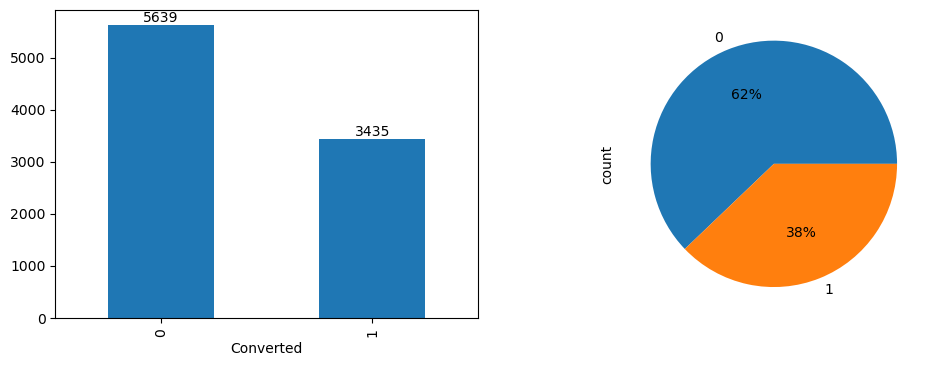

In [110]:
# Variable distribution through bar plot and pie plot
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
ax = lead_data1.Converted.value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.subplot(1,2,2)
lead_data1.Converted.value_counts().plot(kind='pie', autopct='%1.0f%%') 
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - It is a binary variable with 62% of the users in Unconverted category and 38% users in Converted category. 

</div>

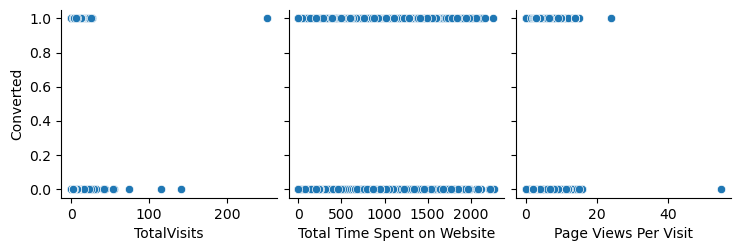

In [112]:
# Let's see how 'Converted' is related with other numerical variables using scatter plot
sns.pairplot(lead_data1, x_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], y_vars='Converted', kind='scatter')
plt.show()

### 2. Lead Origin

In [114]:
# Count of non-null values 
lead_data1['Lead Origin'].describe()

count                        9074
unique                          4
top       Landing Page Submission
freq                         4885
Name: Lead Origin, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Lead Origin' variable refers to the identifier with which the customer was identified to be a lead.
 - There are no null values in the column.
 - It has 4 unique values.
 - The most frequently apprearing value is 'Landing Page Submission'.

</div>

In [116]:
# Names of unique values in the column
lead_data1['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import'],
      dtype=object)

In [117]:
# % distribution of categories in the column
lead_data1['Lead Origin'].value_counts(normalize=True)*100

Lead Origin
Landing Page Submission   53.835
API                       39.431
Lead Add Form              6.403
Lead Import                0.331
Name: proportion, dtype: float64

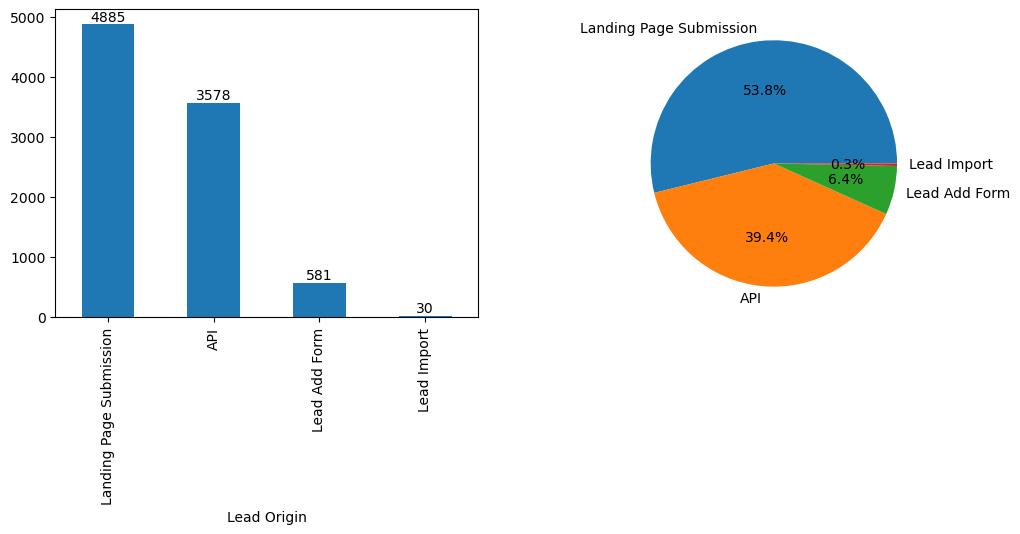

In [118]:
# Variable distribution through bar plot and pie plot
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
ax = lead_data1['Lead Origin'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.subplot(1,2,2)
origin_counts = lead_data1['Lead Origin'].value_counts()
labels = origin_counts.index
sizes = origin_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Most of the leads were identified through 'Landing page submission' (53.8%) while least were identified through 'Lead import' (0.3%).

</div>

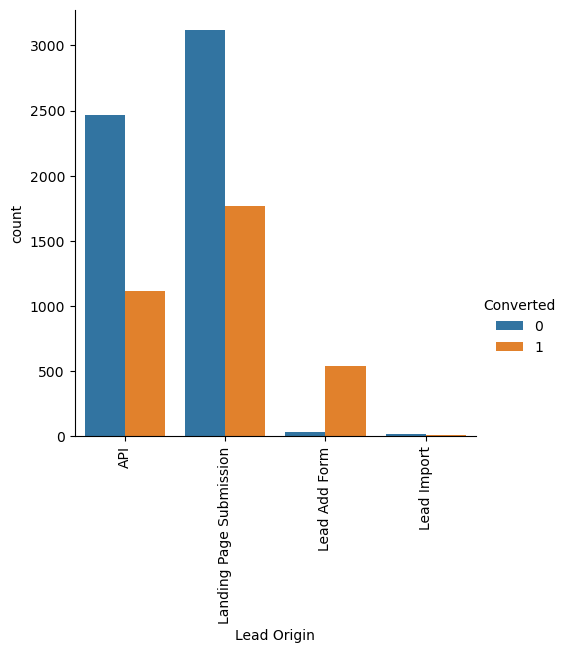

In [120]:
# Plotting count of converted vs. unconverted leads by Lead Origin
sns.catplot(data=lead_data1, x='Lead Origin', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

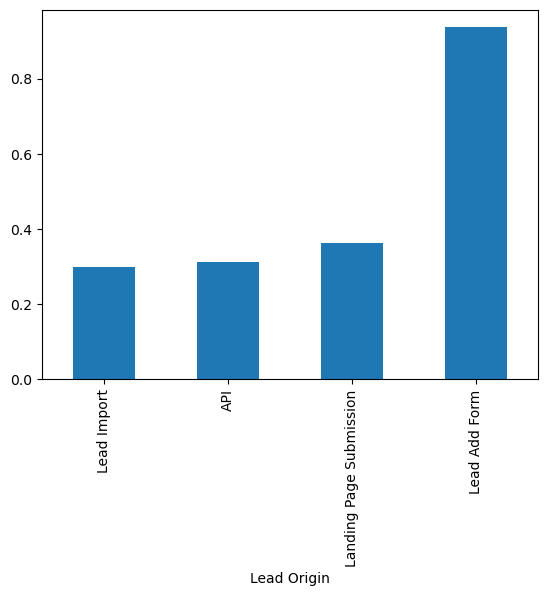

In [121]:
lead_data1.groupby(['Lead Origin'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though most of the leads were identified through 'Landing page submission' the highest leads conversion was seen in the category of 'Lead add form'
</div>

### 3. Lead Source

In [124]:
# Count of non-null values 
lead_data1['Lead Source'].describe()

count       9074
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Lead Source' variable refers to the source of the lead.
 - There are no null values in the column.
 - It has 21 unique values.
 - The most frequently apprearing value is 'Google'.

</div>

In [126]:
# Names of unique values in the column
lead_data1['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [127]:
# Converting all the values in column to lower case as some categories are in title case and some are in lower case
lead_data1['Lead Source'] = lead_data1['Lead Source'].apply(lambda a:a.lower() if type(a) == str else a)

In [128]:
# Combining data of similar categories whose names have been entered differently
lead_data1['Lead Source'] = lead_data1['Lead Source'].replace(['welearnblog_home','blog'],'welearn')

In [129]:
# % distribution of categories in the column
lead_data1['Lead Source'].value_counts(normalize=True)*100

Lead Source
google              31.662
direct traffic      28.025
olark chat          19.319
organic search      12.718
reference            4.882
welingak website     1.422
referral sites       1.378
facebook             0.342
bing                 0.066
click2call           0.044
welearn              0.033
social media         0.022
live chat            0.022
press_release        0.022
testone              0.011
pay per click ads    0.011
youtubechannel       0.011
nc_edm               0.011
Name: proportion, dtype: float64

In [130]:
# As some categories have very few cases assigned against them, we can combine those lead source categories into 'other_sources'
lead_data1['Lead Source'] = lead_data1['Lead Source'].replace(['click2call','welearn','social media','live chat','press_release','testone','pay per click ads','youtubechannel','nc_edm'],'other_sources')

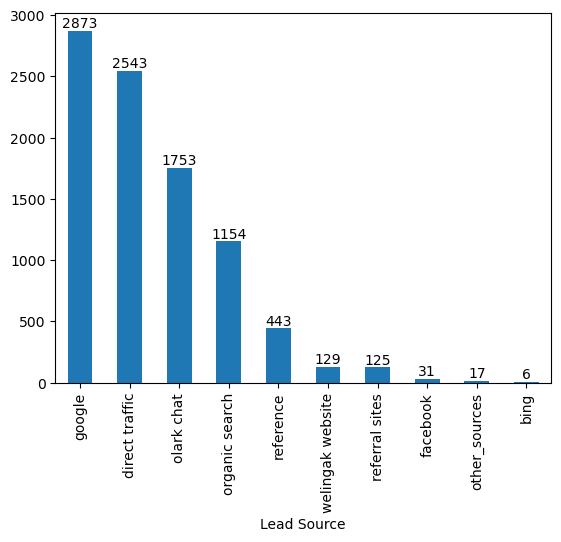

In [131]:
# Variable distribution through bar plot 
ax = lead_data1['Lead Source'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 -  Most of the leads were sourced through 'google' (31.7%) while least were sourced through 'testone', 'pay per click ads', 'youtube channel', and 'nc_edm'.

</div>

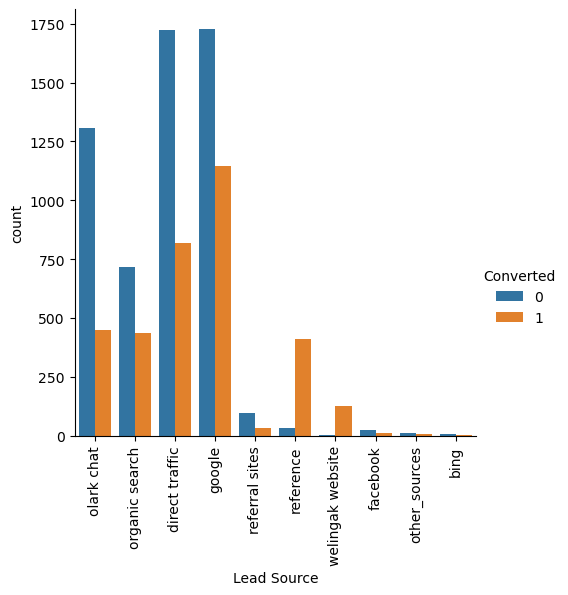

In [133]:
# Plotting count of converted vs. unconverted leads by Lead Source
sns.catplot(data=lead_data1, x='Lead Source', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

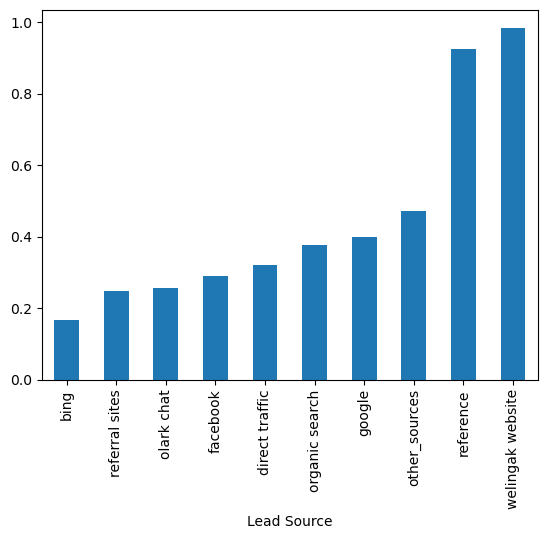

In [134]:
lead_data1.groupby(['Lead Source'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 -  Though most of the leads were sourced through 'google' the % of lead conversion was the highest in leads sourced through 'welingak website' and 'reference'. 

</div>

### 4. Do Not Email

In [137]:
# Count of non-null values 
lead_data1['Do Not Email'].describe()

count     9074
unique       2
top         No
freq      8358
Name: Do Not Email, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Do Not Email' variable refers to the choice selected by the customer wherein they select whether or not they want to be emailed about the course.
 - There are no null values in the column.
 - It has 2 unique values.
 - The most frequently apprearing value is 'No'.

</div>

In [139]:
# % distribution of categories in the column
lead_data1['Do Not Email'].value_counts(normalize=True)*100

Do Not Email
No    92.109
Yes    7.891
Name: proportion, dtype: float64

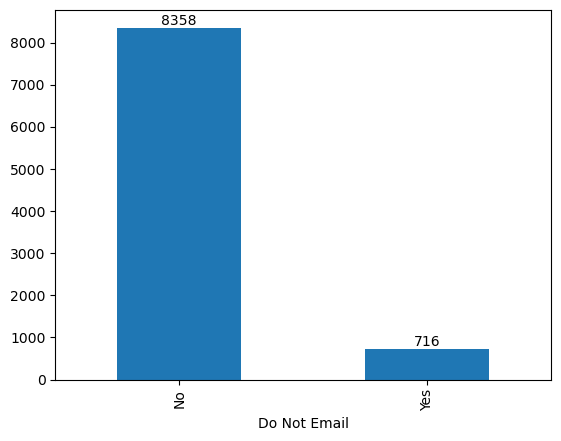

In [140]:
# Variable distribution through bar plot 
ax = lead_data1['Do Not Email'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

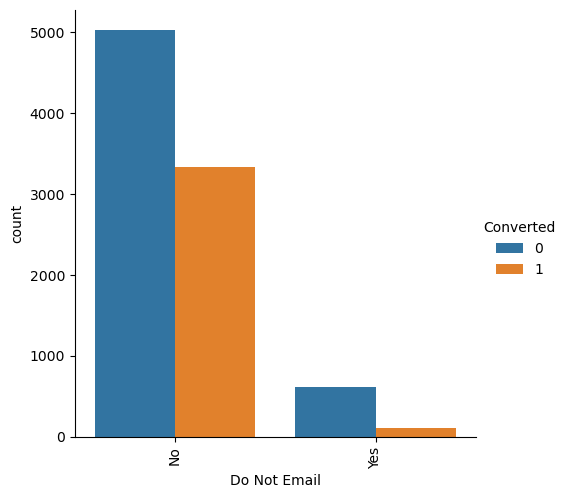

In [141]:
# Plotting count of converted vs. unconverted leads by Do Not Email
sns.catplot(data=lead_data1, x='Do Not Email', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

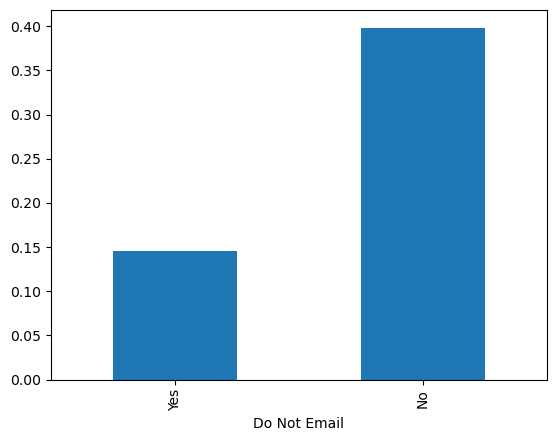

In [142]:
lead_data1.groupby(['Do Not Email'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though 92.1% of the leads chose 'No' for the category 'Do Not Email', the maximum lead conversion was seen in the same group of leads. 

</div>

### 5. Do Not Call

In [145]:
# Count of non-null values 
lead_data1['Do Not Call'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Do Not Call, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Do Not Call' variable refers to the choice selected by the customer wherein they select whether or not they want to be called about the course.
 - There are no null values in the column.
 - It has 2 unique values.
 - The most frequently apprearing value is 'No'.

</div>

In [147]:
# distribution of categories in the column
lead_data1['Do Not Call'].value_counts()

Do Not Call
No     9072
Yes       2
Name: count, dtype: int64

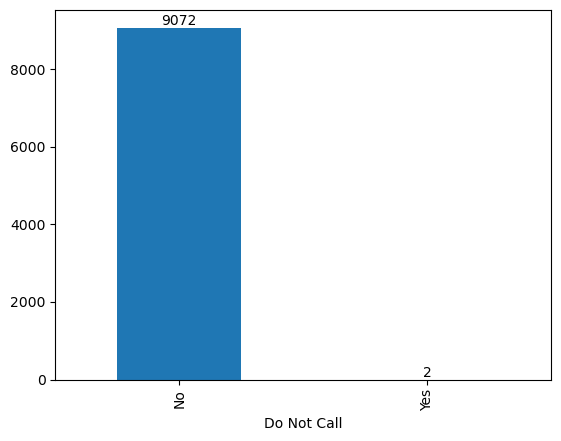

In [148]:
# Variable distribution through bar plot 
ax = lead_data1['Do Not Call'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

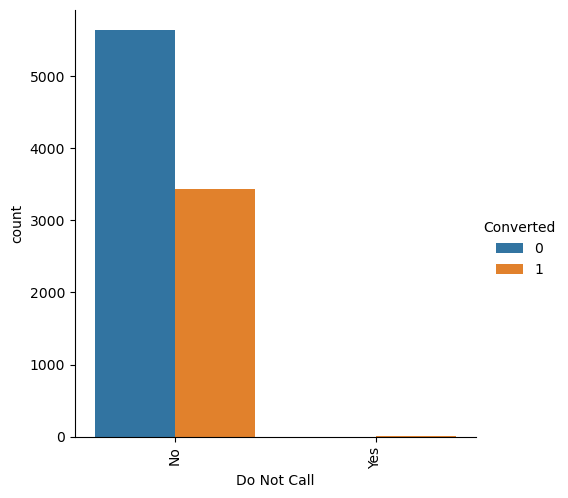

In [149]:
# Plotting count of converted vs. unconverted leads by Do Not Call
sns.catplot(data=lead_data1, x='Do Not Call', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 -  As 9072 out of 9074 leads chose the option 'No' for the category 'Do Not Call', there is limited variability and information conveyed by this column and it can be deleted. 

</div>

In [151]:
# Dropping 'Do Not Call' column

lead_data1.drop(['Do Not Call'], axis=1, inplace=True)
lead_data1.shape

(9074, 20)

### 6. TotalVisits

In [153]:
# Count of non-null values 
lead_data1['TotalVisits'].describe()

count   9,074.000
mean        3.456
std         4.859
min         0.000
25%         1.000
50%         3.000
75%         5.000
max       251.000
Name: TotalVisits, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'TotalVisits' variable is a numerical variable that refers to the total number of visits made by the customer on the website.
 - There are no null values in the column.
 - Its mean and median are quite close to each other.
 - However, there is a huge jump in value from 75th percentile to the max value, indicating presence of outliers.

</div>

In [155]:
# % distribution of categories in the column
lead_data1['TotalVisits'].value_counts()

TotalVisits
0.000      2161
2.000      1679
3.000      1306
4.000      1120
5.000       783
6.000       466
1.000       395
7.000       309
8.000       224
9.000       164
10.000      114
11.000       86
13.000       48
12.000       45
14.000       36
16.000       21
15.000       18
17.000       16
18.000       15
20.000       12
19.000        9
21.000        6
23.000        6
24.000        5
25.000        5
27.000        5
22.000        3
29.000        2
28.000        2
26.000        2
141.000       1
55.000        1
30.000        1
43.000        1
74.000        1
41.000        1
54.000        1
115.000       1
251.000       1
32.000        1
42.000        1
Name: count, dtype: int64

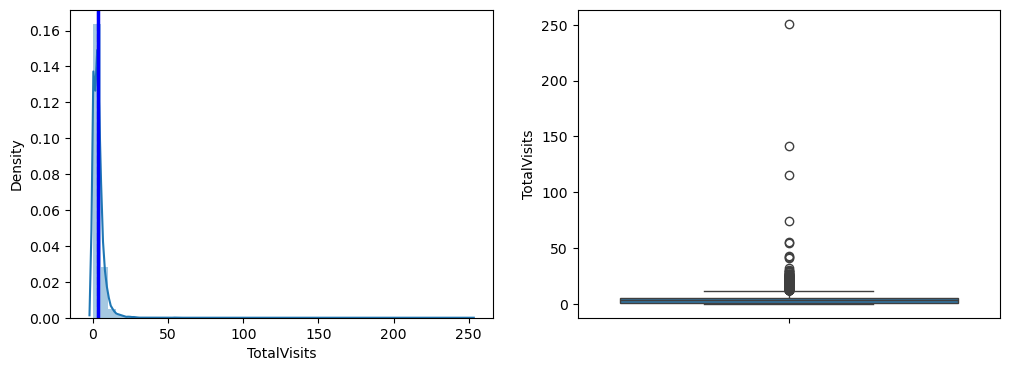

In [156]:
# Variable distribution through bar plot and box plot
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(lead_data1['TotalVisits'])
plt.axvline(lead_data1['TotalVisits'].mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=lead_data1['TotalVisits'].median(), color='Blue', ls='-', lw=2.5)
plt.subplot(1,2,2)
sns.boxplot(lead_data1['TotalVisits'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As 'TotalVisits' column has outliers, the distribution can not be seen clearly. So, we can consider removing the outliers to ensure extreme values are removed from the column while the valuable information is not lost.  
 
</div>

In [158]:
# Examining the extreme outlier cases
totalvisit_outliers=lead_data1[lead_data1['TotalVisits']>50]
totalvisit_outliers

Prospect ID              Lead Origin  \
2190  0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895  Landing Page Submission   
2322  272696ed-4aff-4b42-8829-b63f122493d9  Landing Page Submission   
5283  8d5d2f30-7ca5-4406-9d2b-3b97114b2cf3  Landing Page Submission   
5538  b978e9bb-8960-4d23-b7e4-4db879f05a6c  Landing Page Submission   
5608  0fb67fc7-ec4b-4096-b3b4-4732f1fa2449  Landing Page Submission   
6102  f787f694-b4c4-4763-a4ae-9f39a0a052b6  Landing Page Submission   

         Lead Source Do Not Email  Converted  TotalVisits  \
2190  direct traffic          Yes          0       55.000   
2322  direct traffic          Yes          0      141.000   
5283  direct traffic          Yes          0       74.000   
5538  referral sites           No          0       54.000   
5608  referral sites          Yes          0      115.000   
6102  direct traffic           No          1      251.000   

      Total Time Spent on Website  Page Views Per Visit  \
2190                          297                55.000   
2322                          755                 6.710   
5283                         1209                12.330   
5538                         1280                 4.500   
5608                          187                 8.210   
6102                           49                 1.480   

                Last Activity             Specialization  \
2190  Page Visited on Website     IT Projects Management   
2322  Page Visited on Website  Human Resource Management   
5283  Page Visited on Website                    Missing   
5538                 SMS Sent                    Missing   
5608  Page Visited on Website     Rural and Agribusiness   
6102  Page Visited on Website    Supply Chain Management   

     What is your current occupation Search Newspaper Article  \
2190                      Unemployed     No                No   
2322                         Missing     No                No   
5283                      Unemployed     No                No   
5538                         Missing     No                No   
5608                      Unemployed     No                No   
6102                      Unemployed     No                No   

     X Education Forums Newspaper Digital Advertisement  \
2190                 No        No                    No   
2322                 No        No                    No   
5283                 No        No                    No   
5538                 No        No                    No   
5608                 No        No                    No   
6102                 No        No                    No   

     Through Recommendations               City  \
2190                      No       Other Cities   
2322                      No             Mumbai   
5283                      No  Thane & Outskirts   
5538                      No             Mumbai   
5608                      No             Mumbai   
6102                      No             Mumbai   

     A free copy of Mastering The Interview    Last Notable Activity  
2190                                    Yes                 Modified  
2322                                    Yes  Page Visited on Website  
5283                                     No  Page Visited on Website  
5538                                     No                 SMS Sent  
5608                                     No  Page Visited on Website  
6102                                    Yes  Page Visited on Website

In [159]:
# Dropping the extreme outlier cases
lead_data1=lead_data1.drop(totalvisit_outliers.index)
lead_data1.shape

(9068, 20)

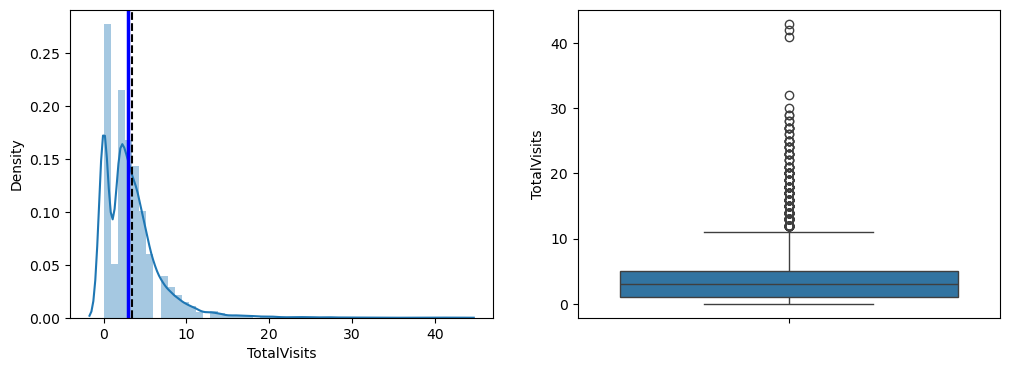

In [160]:
# Rechecking distribution and outliers in the variable
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(lead_data1['TotalVisits'])
plt.axvline(lead_data1['TotalVisits'].mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=lead_data1['TotalVisits'].median(), color='Blue', ls='-', lw=2.5)
plt.subplot(1,2,2)
sns.boxplot(lead_data1['TotalVisits'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - With the outliers removed, we can see that most of the leads have made 0 visits to the website while many of have visited the website more than once.  
 
</div>

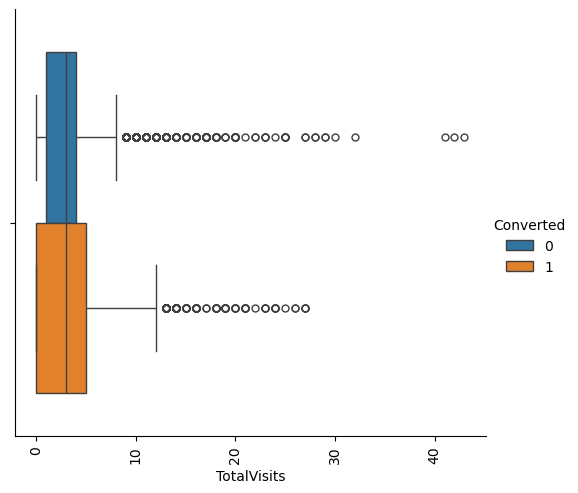

In [162]:
# Plotting count of converted vs. unconverted leads by TotalVisits
sns.catplot(data=lead_data1, x='TotalVisits', hue='Converted', kind='box')
plt.xticks(rotation=90)
plt.show()

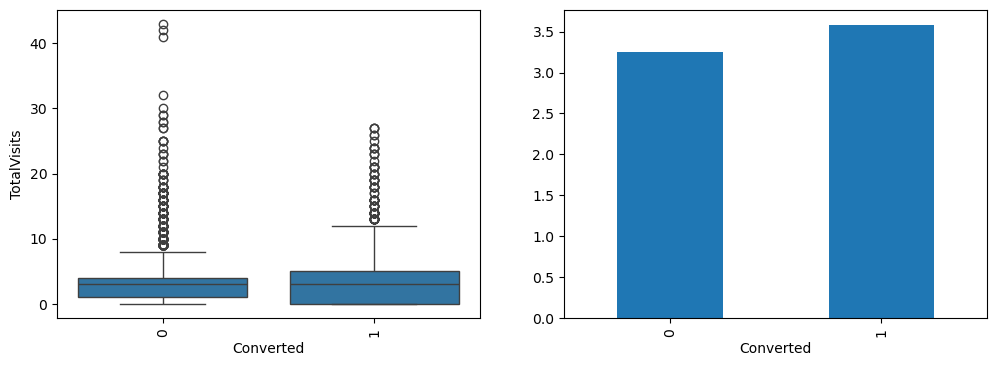

In [163]:
# Boxplot and bar plot of converted vs. unconverted leads by TotalVisits
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data=lead_data1, y='TotalVisits', x='Converted')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
lead_data1.groupby(['Converted'])['TotalVisits'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - In general, the trend seems to be that the more number of times the customer visited the website, the higher were their chances of conversion.
 - However, customers who had made 0 visits to the website also showed a moderate amount of conversion rate. 
 
</div>

### 7. Total Time Spent on Website

In [166]:
# Count of non-null values 
lead_data1['Total Time Spent on Website'].describe()

count   9,068.000
mean      482.790
std       545.280
min         0.000
25%        11.000
50%       246.000
75%       922.250
max     2,272.000
Name: Total Time Spent on Website, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Total Time Spent on Website' variable is a numerical variable that refers to the total time spent by the customer on the website.
 - There are no null values in the column.
 - Its mean and median are far from each other.
 - Also, there is a huge jump in value from 75th percentile to the max value, indicating presence of outliers.

</div>

In [168]:
# % distribution of categories in the column
lead_data1['Total Time Spent on Website'].value_counts()

Total Time Spent on Website
0       2165
60        19
127       18
75        18
74        17
        ... 
609        1
1035       1
840        1
802        1
927        1
Name: count, Length: 1717, dtype: int64

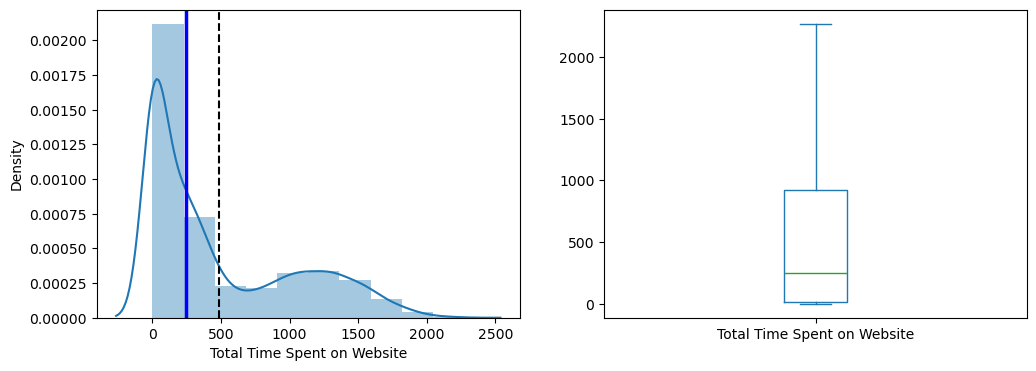

In [169]:
# Variable distribution through bar plot and box plot
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(lead_data1['Total Time Spent on Website'], bins=10)
plt.axvline(lead_data1['Total Time Spent on Website'].mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=lead_data1['Total Time Spent on Website'].median(), color='Blue', ls='-', lw=2.5)
plt.subplot(1,2,2)
lead_data1['Total Time Spent on Website'].plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - We can see from the histogram and the box plot that the distribution is right skewed with a tail training towards the left.
 - Most of the customers seem to have spent 0 units of time on the website with a small minority having spent more than 1500 units of time. 
 
</div>

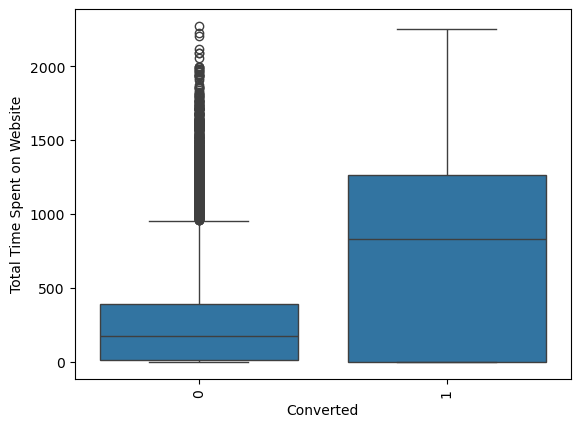

In [171]:
# Plotting count of converted vs. unconverted leads by Total Time Spent on Website
sns.boxplot(data=lead_data1, y='Total Time Spent on Website', x='Converted')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - From the above boxplot we can see that the leads who converted to customers spent a lot more time on the website than those who didnt though there are also cases where the conversion happened without the lead having spent any time on the website too.
 
</div>

### 8. Page Views Per Visit

In [174]:
# Count of non-null values 
lead_data1['Page Views Per Visit'].describe()

count   9,068.000
mean        2.362
std         2.086
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        24.000
Name: Page Views Per Visit, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Page Views Per Visit' variable is a numerical variable that refers to the average number of pages on the website viewed during the visits..
 - There are no null values in the column.
 - Its mean and median are close to each other.
 - However, there is a huge jump in values from 75th percentile to the max value, indicating presence of outliers.

</div>

In [176]:
# % distribution of categories in the column
lead_data1['Page Views Per Visit'].value_counts(normalize=True)

Page Views Per Visit
0.000   0.238
2.000   0.198
3.000   0.132
4.000   0.099
1.000   0.072
         ... 
2.560   0.000
6.330   0.000
1.640   0.000
4.400   0.000
2.080   0.000
Name: proportion, Length: 109, dtype: float64

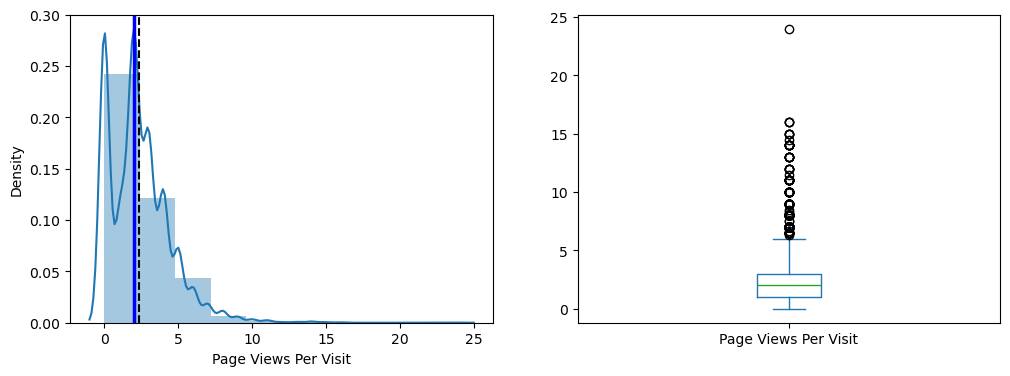

In [177]:
# Variable distribution through bar plot and box plot
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(lead_data1['Page Views Per Visit'], bins=10)
plt.axvline(lead_data1['Page Views Per Visit'].mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=lead_data1['Page Views Per Visit'].median(), color='Blue', ls='-', lw=2.5)
plt.subplot(1,2,2)
lead_data1['Page Views Per Visit'].plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - We can see from the histogram that the distribution is right skewed with a long tail training towards the left. Most of the customers seem to have viewed 0 pages on the website with a small minority who seems to have viewed more than 10 pages.
 - It is visible from the box plot that there are outliers towards the higher end, in the data.
 
</div>

In [179]:
# Examining the extreme outlier cases
page_outliers=lead_data1[lead_data1['Page Views Per Visit']>11]
page_outliers

Prospect ID              Lead Origin  \
56    59e722da-edff-43d9-af61-f5c8bcc986c4  Landing Page Submission   
125   46921843-bfc8-443d-96f8-18495891aef6                      API   
168   ba13e654-406e-4d3f-9fc1-0803087a41eb  Landing Page Submission   
246   e15342a3-ca98-4401-8a76-a7ff920546c7                      API   
292   4beec5ec-bdea-4ecd-ab89-345060e38bc2  Landing Page Submission   
387   23911ee3-0be8-4985-9ef6-a372791eecf0  Landing Page Submission   
579   eda6996c-7d0b-46ce-ad60-f2ee9c85c148                      API   
1697  7211d363-f4e7-4d36-b2f5-7ba34c502062                      API   
2950  83c10034-a3e5-4836-b5b5-d9068ef237cc  Landing Page Submission   
4252  49b7b2a9-da40-4678-8a36-2d4ddd528760                      API   
4518  c4a9e8a0-15fd-473a-acb1-12ef4529c511  Landing Page Submission   
5026  698a32b4-24a3-4c35-be41-b7e8710f31bc                      API   
5164  7b9369a0-b997-41f0-8a04-68677de0f1c8  Landing Page Submission   
5462  3709851e-4826-4fe0-96dd-083f8201e2df  Landing Page Submission   
5495  48a5b72c-db78-48ab-bb15-8210754102ab  Landing Page Submission   
5531  2e168001-eae4-49dc-abf0-6219d172619f  Landing Page Submission   
5915  0f7996c8-63be-49d2-894d-a93f3883fe31  Landing Page Submission   
6051  ba6b7f4f-db8f-4a0c-82a1-83f8ff8037b4  Landing Page Submission   
6300  b0bce721-f716-4349-bce1-a1ccec0fa4c2  Landing Page Submission   
6695  a11975ac-a4e3-4e4e-b035-e1601476b03c  Landing Page Submission   
6805  57c557f0-f373-4468-affb-3ed5a03ea47c                      API   
6951  bc1e77a1-4cf2-4e6d-80ed-7c32ce5a714c  Landing Page Submission   
7505  78318c39-6b46-4e70-a587-29837cee1b4e  Landing Page Submission   
7685  24952b8b-6d1a-424d-afcc-82464e4866f8  Landing Page Submission   
8001  eb1e4349-0c1b-4544-8704-6ef6b435f8a5  Landing Page Submission   
8218  92000e31-7ab3-4692-a9cb-8c22279c6832  Landing Page Submission   
8281  8ae64c2a-2778-47bf-935f-1dcf9d2fc2ea  Landing Page Submission   
8322  2a657d69-c45d-4af7-a675-9cda225b1009  Landing Page Submission   
8640  9a80edfb-bc55-487d-ba35-921fde3e0625  Landing Page Submission   
8827  5f424d7a-721b-4a47-ba70-7c1d820129ce  Landing Page Submission   

         Lead Source Do Not Email  Converted  TotalVisits  \
56    referral sites           No          1       13.000   
125   referral sites           No          0       16.000   
168   referral sites           No          0       12.000   
246   referral sites           No          0       14.000   
292   direct traffic           No          0       13.000   
387           google           No          0       15.000   
579   organic search           No          0       13.000   
1697          google           No          0       14.000   
2950          google           No          1       14.000   
4252  direct traffic           No          1       12.000   
4518  direct traffic          Yes          0       15.000   
5026  organic search           No          1       26.000   
5164  direct traffic          Yes          0       16.000   
5462  organic search          Yes          1       12.000   
5495          google          Yes          0       16.000   
5531  direct traffic           No          0       14.000   
5915  organic search           No          1       15.000   
6051  organic search           No          1       14.000   
6300  organic search           No          1       14.000   
6695  organic search           No          0       13.000   
6805  organic search           No          1       24.000   
6951  organic search           No          0       13.000   
7505   other_sources          Yes          0       12.000   
7685  direct traffic           No          1       14.000   
8001  organic search           No          0       29.000   
8218  organic search           No          1       14.000   
8281          google           No          0       12.000   
8322  organic search           No          1       14.000   
8640  organic search           No          0       15.000   

In [180]:
# Dropping the extreme outlier cases
lead_data1=lead_data1.drop(page_outliers.index)
lead_data1.shape

(9038, 20)

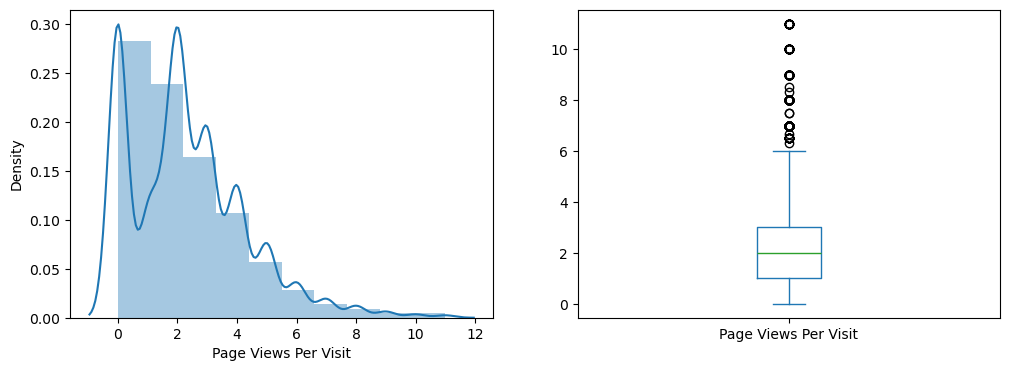

In [181]:
# Rechecking distribution and outliers in the variable
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(lead_data1['Page Views Per Visit'], bins=10)
plt.subplot(1,2,2)
lead_data1['Page Views Per Visit'].plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Most of the leads seem to be viewing between 0 to 3 pages per visit to the website though a minority seem to viewing 6-7 pages too. 
 
</div>

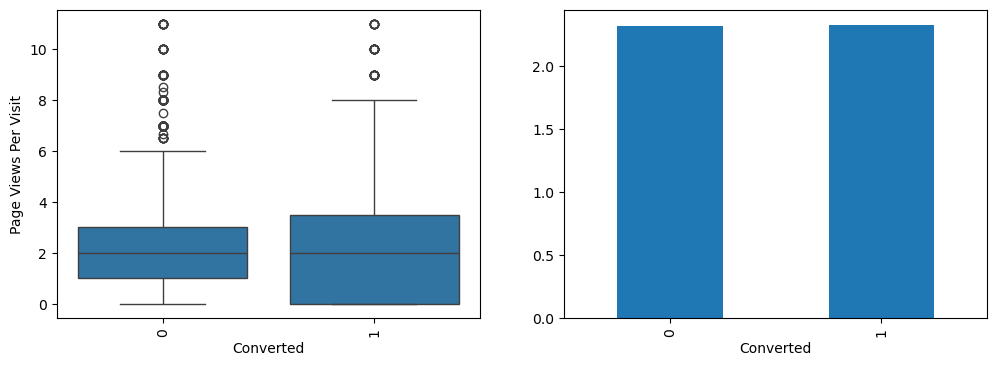

In [183]:
# Boxplot and bar plot of converted vs. unconverted leads by Page Views Per Visit
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data=lead_data1, y='Page Views Per Visit', x='Converted')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
lead_data1.groupby(['Converted'])['Page Views Per Visit'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though there is a slight variation in the range of pages viewed per visit between the converted and unconverted leads, on the whole there is no significant difference in the mean pages viewed per visit among two groups and so Page Views Per Visit is not a differentiating factor for lead conversion.  
 
</div>

In [185]:
# Summary of the difference between the unconverted and converted leads on the numerical variables
lead_data1.groupby('Converted')[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].mean()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
Converted                                                                
0                3.218                      329.094                 2.320
1                3.547                      733.063                 2.329

### 9. & 10. Last Activity and Last Notable Activity

In [187]:
# Count of non-null values 
lead_data1[['Last Activity','Last Notable Activity']].describe()

Last Activity Last Notable Activity
count           9038                  9038
unique            17                    16
top     Email Opened              Modified
freq            3420                  3253

In [188]:
# Names of unique values in the column Last Activity
lead_data1['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [189]:
# Names of unique values in the column Last Notable Activity
lead_data1['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Last Activity' and Last Notable Activity' variables seeem to be recording similar data with a few variations.
***
 - 'Last Activity' refers to the last activity performed by the customer.
 - There are no null values in the column.
 - It has 17 unique values.
 - The most frequently apprearing value is 'Email Opened'.
***
 - 'Last Notable Activity' refers to the last notable activity performed by the student.
 - There are no null values in the column.
 - It has 16 unique values.
 - The most frequently apprearing value is 'Modified'.

</div>

In [191]:
# % distribution of categories in the column
lead_data1[['Last Activity','Last Notable Activity']].value_counts()

Last Activity                 Last Notable Activity       
Email Opened                  Email Opened                    2813
SMS Sent                      SMS Sent                        2146
Olark Chat Conversation       Modified                         787
Email Opened                  Modified                         607
SMS Sent                      Modified                         562
Converted to Lead             Modified                         428
Page Visited on Website       Modified                         317
                              Page Visited on Website          314
Email Bounced                 Modified                         252
Olark Chat Conversation       Olark Chat Conversation          183
Email Link Clicked            Email Link Clicked               172
Form Submitted on Website     Modified                         114
Email Link Clicked            Modified                          94
Email Bounced                 Email Bounced                     60
Unr

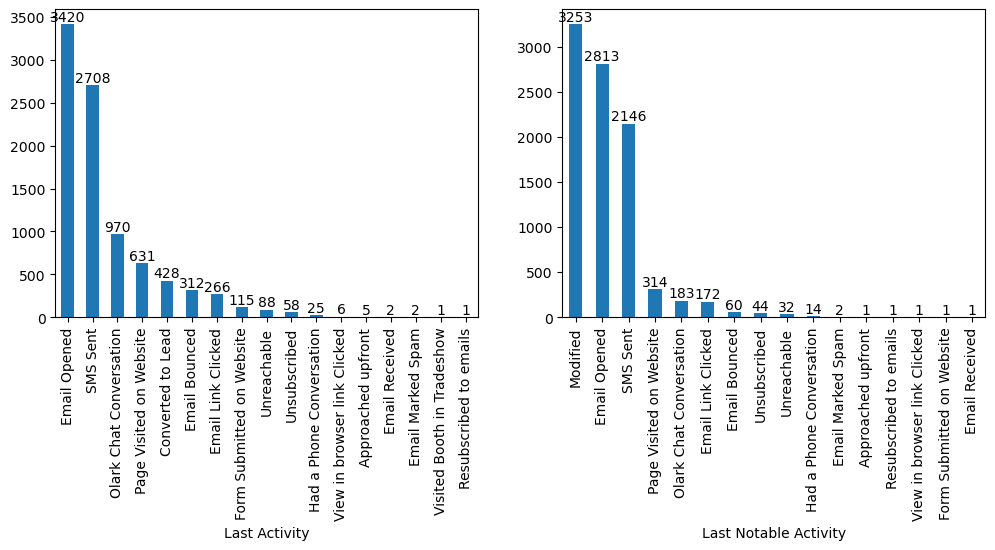

In [192]:
# Variable distribution through bar plot 
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
ax = lead_data1['Last Activity'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.subplot(1,2,2)
ax = lead_data1['Last Notable Activity'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [193]:
# Calculating the no. of cells common between the 2 columns
len(lead_data1[lead_data1['Last Notable Activity']==lead_data1['Last Activity']])

5785

In [194]:
# Calculating the no. of cells different between the 2 columns
len(lead_data1[lead_data1['Last Notable Activity']!=lead_data1['Last Activity']])

3253

In [195]:
# Determining the values in different cells
len(lead_data1[lead_data1['Last Notable Activity']=='Modified'])

3253

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Last Activity' and 'Last Notable Activity' columns only vary by 3267 cells which only contain the value 'Modified'.
 - As 'Last Notable Activity' column does not contain any new information about the users, we can delete this column.

</div>

In [197]:
# Dropping 'Last Notable Activity' column

lead_data1.drop(['Last Notable Activity'], axis=1, inplace=True)
lead_data1.shape

(9038, 19)

In [198]:
# Checking for categories in column with 6 or less value counts
[lead_data1['Last Activity'].value_counts()<=6]

[Last Activity
 Email Opened                    False
 SMS Sent                        False
 Olark Chat Conversation         False
 Page Visited on Website         False
 Converted to Lead               False
 Email Bounced                   False
 Email Link Clicked              False
 Form Submitted on Website       False
 Unreachable                     False
 Unsubscribed                    False
 Had a Phone Conversation        False
 View in browser link Clicked     True
 Approached upfront               True
 Email Received                   True
 Email Marked Spam                True
 Visited Booth in Tradeshow       True
 Resubscribed to emails           True
 Name: count, dtype: bool]

In [199]:
# Combining the categories with 6 or less values into 'Other activity'
lead_data1['Last Activity'] = lead_data1['Last Activity'].replace(['View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Other activity')

In [200]:
# Rechecking value counts in the column
lead_data1['Last Activity'].value_counts()

Last Activity
Email Opened                 3420
SMS Sent                     2708
Olark Chat Conversation       970
Page Visited on Website       631
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            266
Form Submitted on Website     115
Unreachable                    88
Unsubscribed                   58
Had a Phone Conversation       25
Other activity                 17
Name: count, dtype: int64

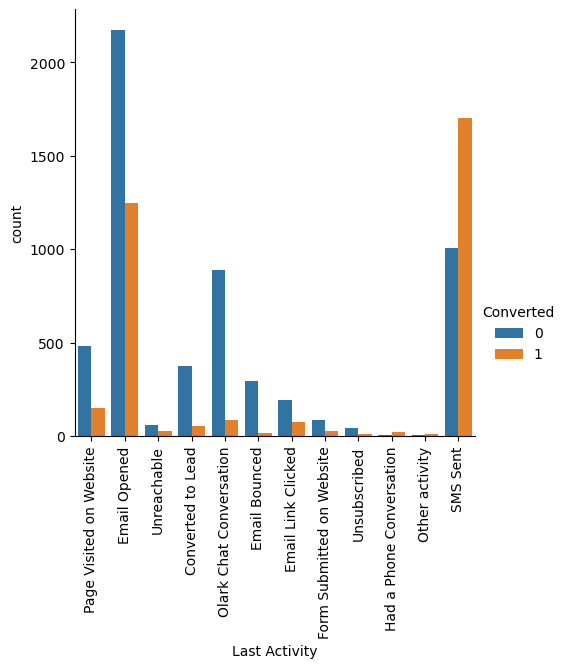

In [201]:
# Plotting count of converted vs. unconverted leads by Last Activity
sns.catplot(data=lead_data1, x='Last Activity', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

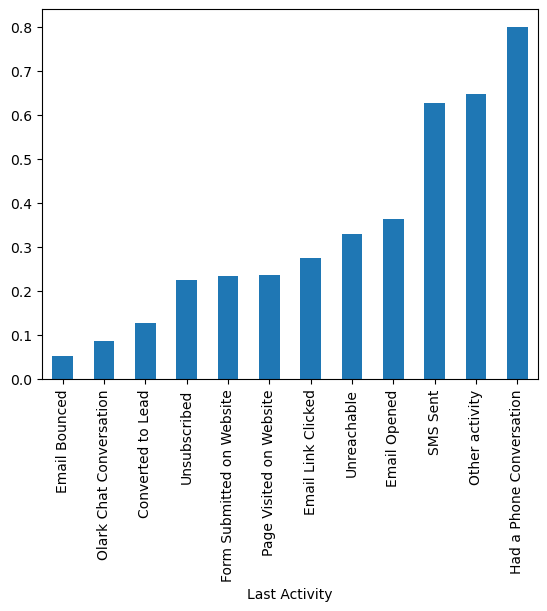

In [202]:
lead_data1.groupby(['Last Activity'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The highest lead conversion rate was seen in case of customers whose last activity was 'Had a Phone Conversation'. In general, the trend seems to be that the if the customer had shared their phone number and email for further contact and were reachable for communication, the higher were their chances of conversion.
 - However, customers who either shared the wrong email ID or were not reachable for any reason on email had the lowest conversion rate. 
 
</div>

### 11. Specialization

In [205]:
# Count of non-null values 
lead_data1['Specialization'].describe()

count        9038
unique         19
top       Missing
freq         3275
Name: Specialization, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
 
 - 'Specialization' refers to the industry domain in which the customer worked before applying for the course. 
 - There are no null values in the column though it has 36.2% missing values.
 - It has 19 unique values.
 - The most frequently apprearing value is 'Missing'.

</div>

In [207]:
# Names of unique values in the column Specialization
lead_data1['Specialization'].unique()

array(['Missing', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [208]:
# % distribution of categories in the column
lead_data1['Specialization'].value_counts(normalize=True)*100

Specialization
Missing                             36.236
Finance Management                  10.566
Human Resource Management            9.228
Marketing Management                 9.062
Operations Management                5.521
Business Administration              4.404
IT Projects Management               4.016
Supply Chain Management              3.806
Banking, Investment And Insurance    3.696
Media and Advertising                2.224
Travel and Tourism                   2.191
International Business               1.925
Healthcare Management                1.726
Hospitality Management               1.228
E-COMMERCE                           1.217
Retail Management                    1.084
Rural and Agribusiness               0.797
E-Business                           0.631
Services Excellence                  0.443
Name: proportion, dtype: float64

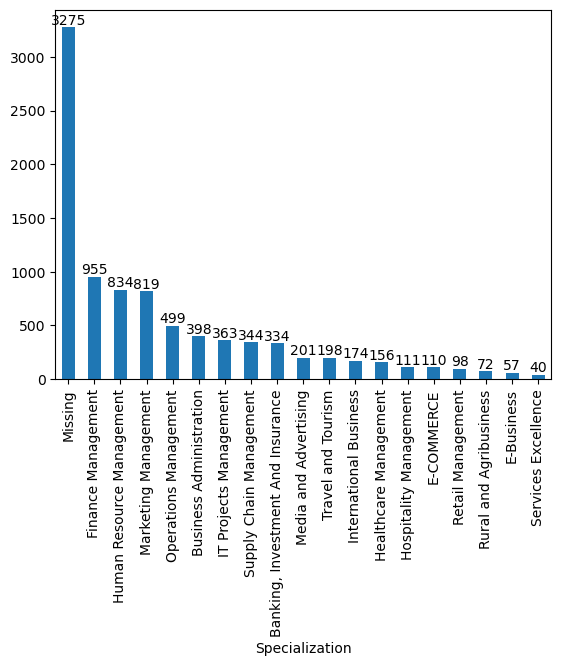

In [209]:
# Variable distribution through bar plot 
ax = lead_data1['Specialization'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

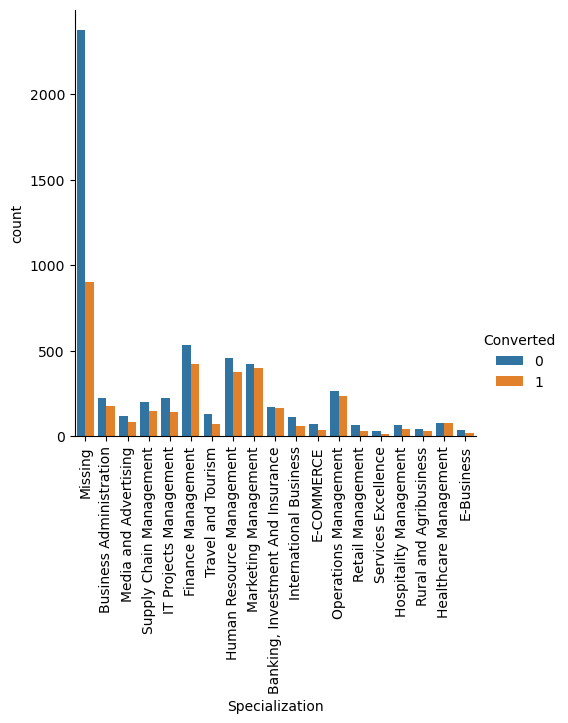

In [210]:
# Plotting count of converted vs. unconverted leads by Specialization
sns.catplot(data=lead_data1, x='Specialization', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

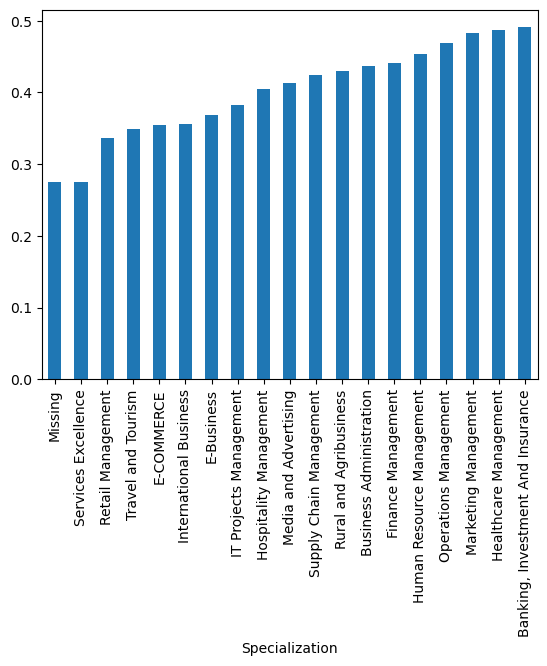

In [211]:
lead_data1.groupby(['Specialization'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The mean lead conversion rate was generally higher incase of leads with specializations in core business and support functions like Banking / Healthcare/ Marketing and Finance / HR/ Operations.
 - On the other hand, the lowest mean lead conversion rate was seen incase of leads with specialization in Service Excellence.
 - As the column has 36.2% missing values, we can delete the column.
 
</div>

In [213]:
# Dropping 'Specialization' column

lead_data1.drop(['Specialization'], axis=1, inplace=True)
lead_data1.shape

(9038, 18)

### 12. What is your current occupation

In [215]:
# Count of non-null values 
lead_data1['What is your current occupation'].describe()

count           9038
unique             7
top       Unemployed
freq            5455
Name: What is your current occupation, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
 
 - 'What is your current occupation' indicates whether the customer is a student, umemployed or employed. 
 - There are no null values in the column.
 - It has 7 unique values.
 - The most frequently apprearing value is 'Unemployed'.

</div>

In [217]:
# Names of unique values in the column What is your current occupation
lead_data1['What is your current occupation'].unique()

array(['Unemployed', 'Student', 'Missing', 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [218]:
# % distribution of categories in the column
lead_data1['What is your current occupation'].value_counts(normalize=True)*100

What is your current occupation
Unemployed             60.356
Missing                29.531
Working Professional    7.480
Student                 2.279
Other                   0.166
Housewife               0.100
Businessman             0.089
Name: proportion, dtype: float64

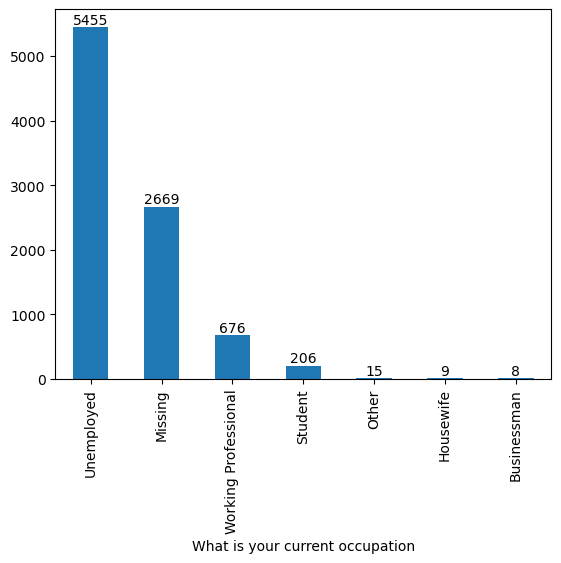

In [219]:
# Variable distribution through bar plot 
ax = lead_data1['What is your current occupation'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
 
 - The leads who are unemployed seem to have 86.21% representation in the column with Working professional at 10.12% and students at 3.19%. Leads who are Businessman have the least represtation in the data at .099%.

</div>

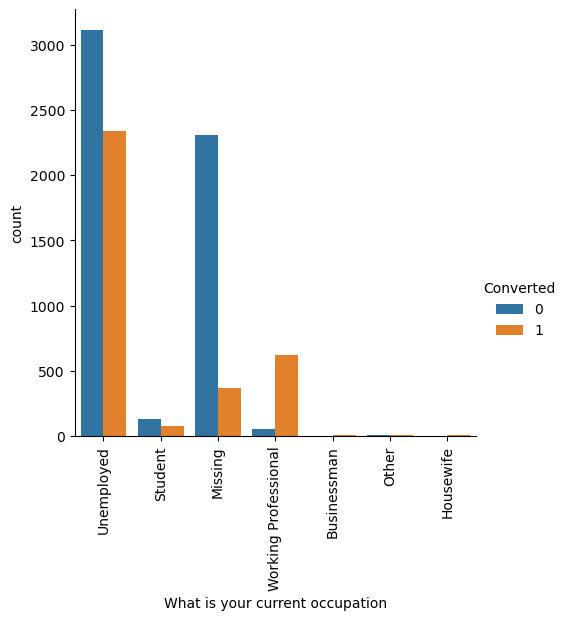

In [221]:
# Plotting count of converted vs. unconverted leads by What is your current occupation
sns.catplot(data=lead_data1, x='What is your current occupation', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

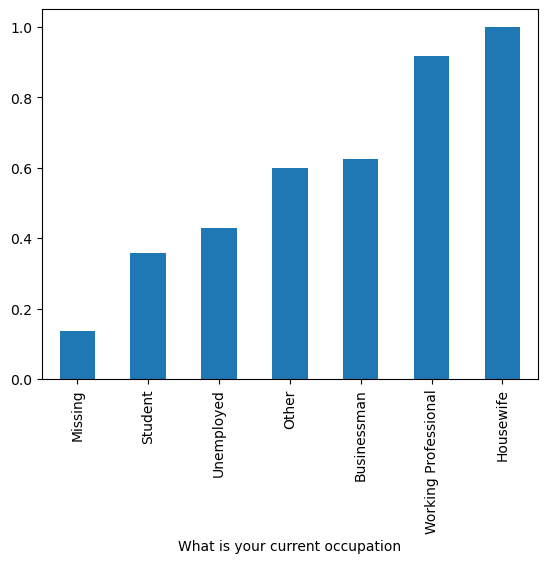

In [222]:
lead_data1.groupby(['What is your current occupation'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though Housewives have only 0.099% and Working professional have only 7.46% representation in the column, they both show the highest mean lead conversion among all the other occupations. This makes sense as the working professionals are most likely to have the funds required to enrol in the course or they may also get sponsored by their company. Further, they are likely to directly benefit from upskilling as they are already employed in an organization. Housewives may be inclusive of women who are trying to get back to the workforce after a break.
 - 'Student' and 'Unemployed' categories show the lowest mean lead conversion as they may be lacking the funds to sponsor their courses. 

</div>

### 13. Search

In [225]:
# Count of non-null values 
lead_data1['Search'].describe()

count     9038
unique       2
top         No
freq      9024
Name: Search, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
 
 - 'Search' indicates whether the customer had seen the ad during a search on the search engine. 
 - There are no null values in the column.
 - It has 2 unique values.
 - The most frequently apprearing value is 'No'.

</div>

In [227]:
# Names of unique values in the column Search
lead_data1['Search'].unique()

array(['No', 'Yes'], dtype=object)

In [228]:
# % distribution of categories in the column
lead_data1['Search'].value_counts(normalize=True)*100

Search
No    99.845
Yes    0.155
Name: proportion, dtype: float64

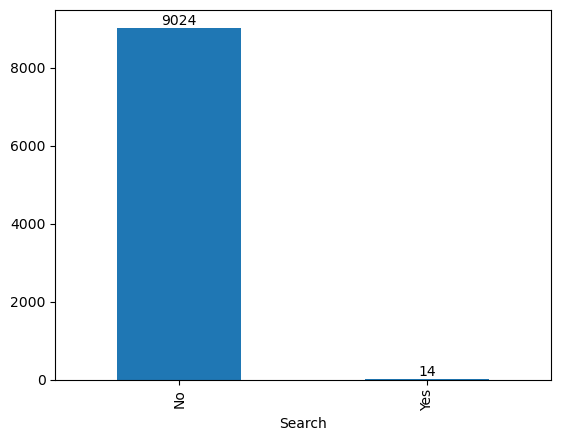

In [229]:
# Variable distribution through bar plot 
ax = lead_data1['Search'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

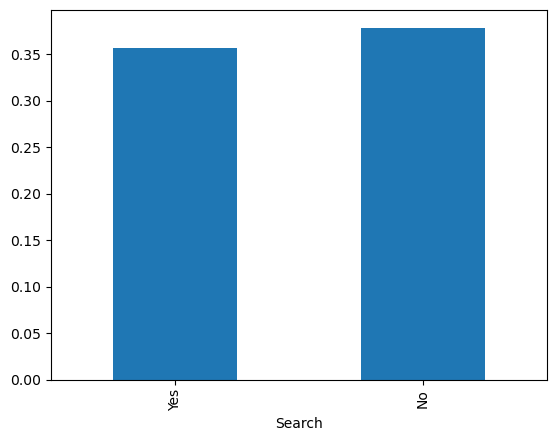

In [230]:
lead_data1.groupby(['Search'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As 99.85% of the column contains the value 'No' which indicates that most of the leads had not viewed the company ad during a search on the search engine, the column does not contain much variability in the data, we can delete the column.

</div>

In [232]:
# Dropping 'Search' column

lead_data1.drop(['Search'], axis=1, inplace=True)
lead_data1.shape

(9038, 17)

### 14. Newspaper Article and 15. Newspaper

In [234]:
# Count of non-null values 
lead_data1[['Newspaper Article','Newspaper']].describe()

Newspaper Article Newspaper
count               9038      9038
unique                 2         2
top                   No        No
freq                9036      9037

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Newspaper Article' and Newspaper' variables seeem to be recording similar data with a few variations.
***
 - 'Newspaper Article' indicates whether the customer had seen the ad in newspaper article.
 - There are no null values in the column.
 - It has 2 unique values.
 - The most frequently apprearing value is 'No.
***
 - 'Newspaper' indicates whether the customer had seen the ad in newspaper article.
 - There are no null values in the column.
 - It has 2 unique values.
 - The most frequently apprearing value is 'No'.

</div>

In [236]:
# distribution of categories in the column
lead_data1[['Newspaper Article','Newspaper']].value_counts()

Newspaper Article  Newspaper
No                 No           9035
Yes                No              2
No                 Yes             1
Name: count, dtype: int64

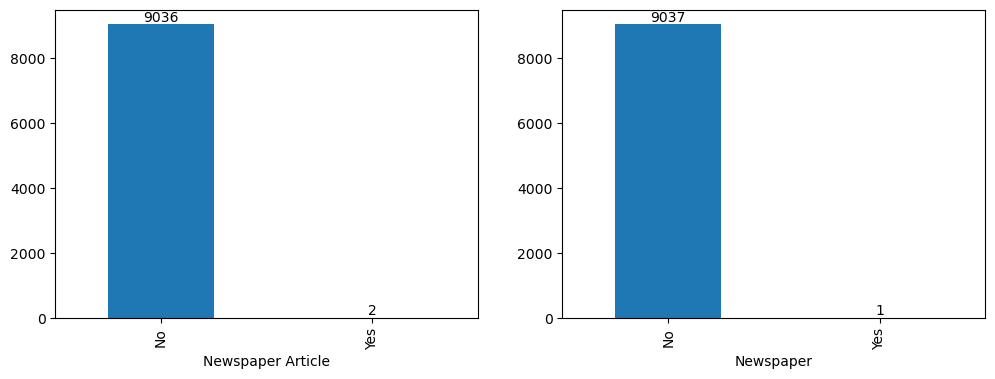

In [237]:
# Variable distribution through bar plot 
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
ax = lead_data1['Newspaper Article'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.subplot(1,2,2)
ax = lead_data1['Newspaper'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [238]:
# Calculating the no. of cells common between the 2 columns
len(lead_data1[lead_data1['Newspaper Article']==lead_data1['Newspaper']])

9035

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'Newspaper Article' and 'Newspaper' columns only vary by 3 cells out of total 9074.
 - 9071 cells in both columns contain the value 'No' which indicates that most of the leads had not viewed the company ad in either the newspaper article or newspaper.
 - As both of these columns do not contain much variation in the data, we can delete both the columns.

</div>

In [240]:
# Dropping 'Newspaper Article' and 'Newspaper' columns

lead_data1.drop(['Newspaper Article','Newspaper'], axis=1, inplace=True)
lead_data1.shape

(9038, 15)

### 16. X Education Forums

In [242]:
# Count of non-null values 
lead_data1['X Education Forums'].describe()

count     9038
unique       2
top         No
freq      9037
Name: X Education Forums, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
 
 - 'X Education Forums' indicates whether the customer had seen the company ad in X Education Forums. 
 - There are no null values in the column.
 - It has 2 unique values.
 - The most frequently apprearing value is 'No'.

</div>

In [244]:
# distribution of categories in the column
lead_data1['X Education Forums'].value_counts()

X Education Forums
No     9037
Yes       1
Name: count, dtype: int64

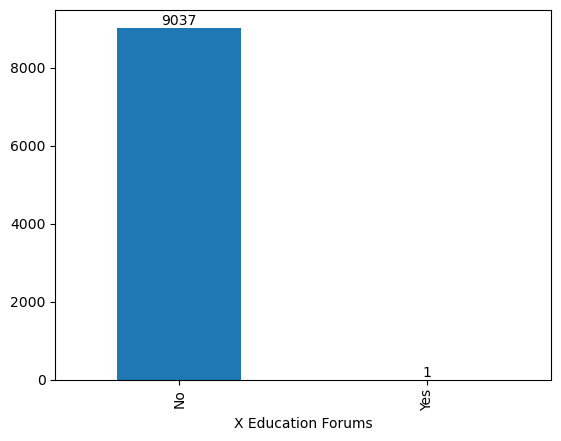

In [245]:
# Variable distribution through bar plot 
ax = lead_data1['X Education Forums'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As more than 99% of the column contains the value 'No' which indicates that most of the leads had not viewed the company ad in X Education Forums, the column does not contain much variability in the data, we can delete the column.

</div>

In [247]:
# Dropping 'X Education Forums' column

lead_data1.drop(['X Education Forums'], axis=1, inplace=True)
lead_data1.shape

(9038, 14)

### 17. Digital Advertisement

In [249]:
# Count of non-null values 
lead_data1['Digital Advertisement'].describe()

count     9038
unique       2
top         No
freq      9034
Name: Digital Advertisement, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
 
 - 'Digital Advertisement' indicates whether the customer had seen the company ad in a digital advertisement. 
 - There are no null values in the column.
 - It has 2 unique values.
 - The most frequently apprearing value is 'No'.

</div>

In [251]:
# distribution of categories in the column
lead_data1['Digital Advertisement'].value_counts()

Digital Advertisement
No     9034
Yes       4
Name: count, dtype: int64

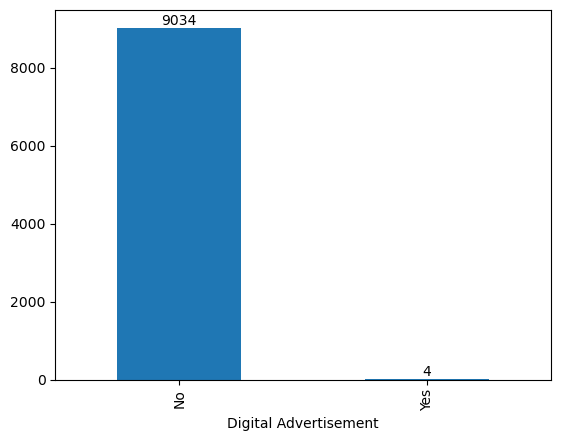

In [252]:
# Variable distribution through bar plot 
ax = lead_data1['Digital Advertisement'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As more than 99% of the column contains the value 'No' which indicates that most of the leads had not viewed the company ad in a digital advertisement, the column does not contain much variability in the data, we can delete the column.

</div>

In [254]:
# Dropping 'Digital Advertisement' column

lead_data1.drop(['Digital Advertisement'], axis=1, inplace=True)
lead_data1.shape

(9038, 13)

### 18. Through Recommendations

In [256]:
# Count of non-null values 
lead_data1['Through Recommendations'].describe()

count     9038
unique       2
top         No
freq      9031
Name: Through Recommendations, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
 
 - 'Through Recommendations' indicates whether the customer came in through recommendations.
 - There are no null values in the column.
 - It has 2 unique values.
 - The most frequently apprearing value is 'No'.

</div>

In [258]:
# distribution of categories in the column
lead_data1['Through Recommendations'].value_counts()

Through Recommendations
No     9031
Yes       7
Name: count, dtype: int64

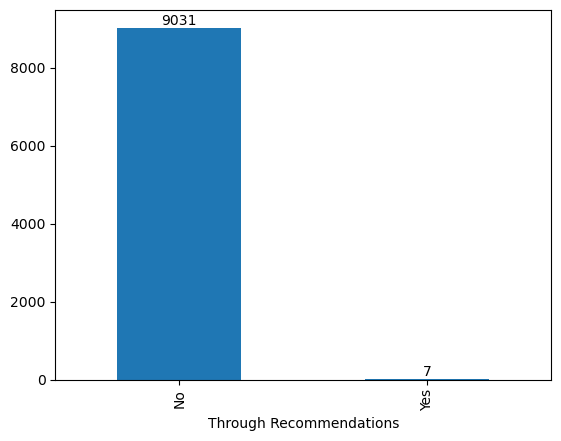

In [259]:
# Variable distribution through bar plot 
ax = lead_data1['Through Recommendations'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As more than 99% of the column contains the value 'No' which indicates that most of the leads had not come in through recommendations, the column does not contain much variability in the data, we can delete the column.

</div>

In [261]:
# Dropping 'Through Recommendations' column

lead_data1.drop(['Through Recommendations'], axis=1, inplace=True)
lead_data1.shape

(9038, 12)

### 19. City

In [263]:
# Count of non-null values 
lead_data1['City'].describe()

count        9038
unique          7
top       Missing
freq         3569
Name: City, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
 
 - 'City' refers to the city of the customer. 
 - There are no null values in the column though it has 39.4% missing values.
 - It has 7 unique values.
 - The most frequently apprearing value is 'Mumbai'.

</div>

In [265]:
# distribution of categories in the column
lead_data1['City'].value_counts(normalize=True)*100

City
Missing                       39.489
Mumbai                        34.986
Thane & Outskirts              8.177
Other Cities                   7.513
Other Cities of Maharashtra    4.890
Other Metro Cities             4.127
Tier II Cities                 0.819
Name: proportion, dtype: float64

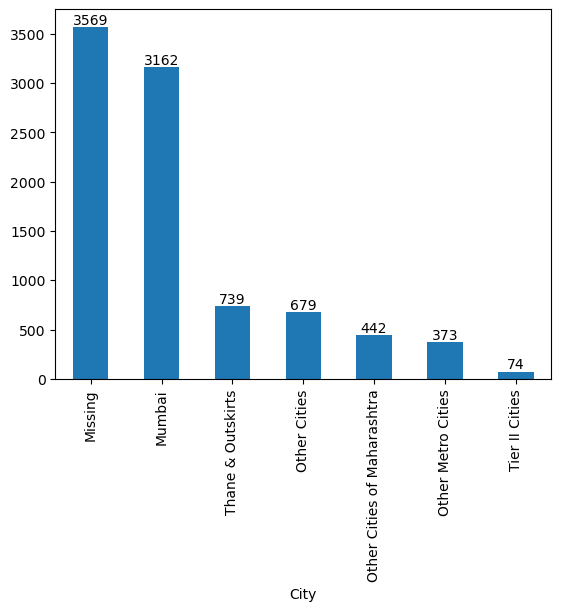

In [266]:
# Variable distribution through bar plot 
ax = lead_data1['City'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

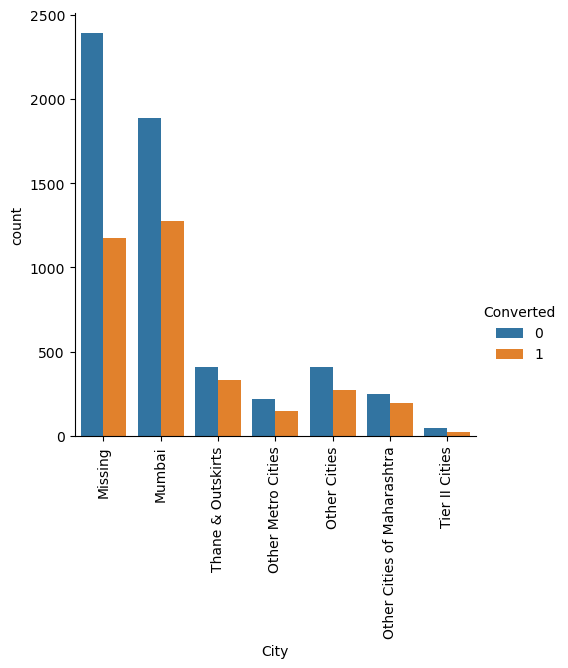

In [267]:
# Plotting count of converted vs. unconverted leads by City
sns.catplot(data=lead_data1, x='City', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

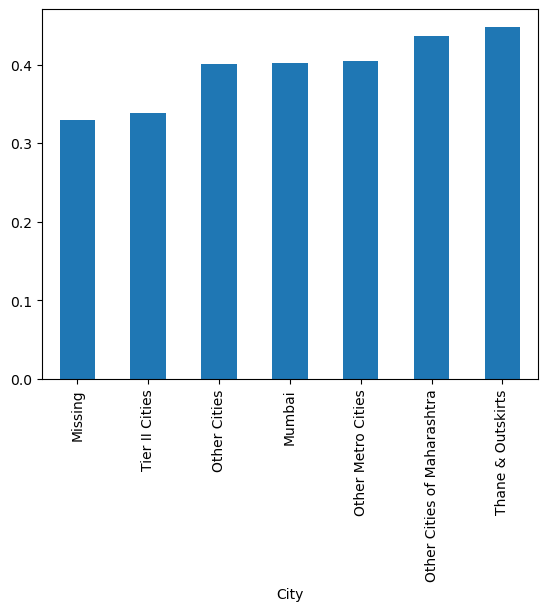

In [268]:
lead_data1.groupby(['City'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Thane & outskirts as well as Other Cities of Maharashtra show highest mean lead conversion with Tier II cities showing the lowest conversion.
 - As the column has 39.4% missing values, we can drop the column.

</div>

In [270]:
# Dropping 'City' column

lead_data1.drop(['City'], axis=1, inplace=True)
lead_data1.shape

(9038, 11)

### 20. A free copy of Mastering The Interview

In [272]:
# Count of non-null values 
lead_data1['A free copy of Mastering The Interview'].describe()

count     9038
unique       2
top         No
freq      6171
Name: A free copy of Mastering The Interview, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
 
 - 'A free copy of Mastering The Interview' indicates whether the customer wants a free copy of 'Mastering the Interview' or not. 
 - There are no null values in the column.
 - It has 2 unique values.
 - The most frequently apprearing value is 'No'.

</div>

In [274]:
# distribution of categories in the column
lead_data1['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6171
Yes    2867
Name: count, dtype: int64

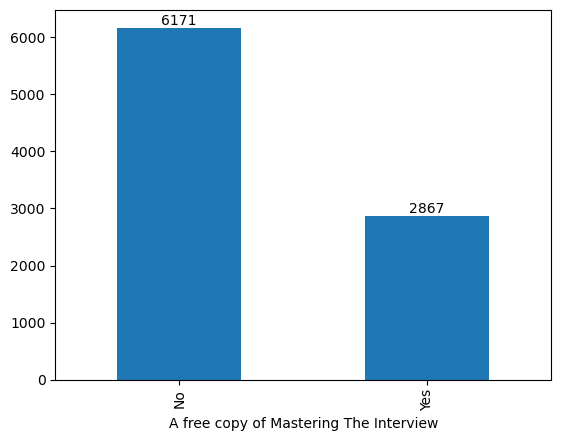

In [275]:
# Variable distribution through bar plot 
ax = lead_data1['A free copy of Mastering The Interview'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

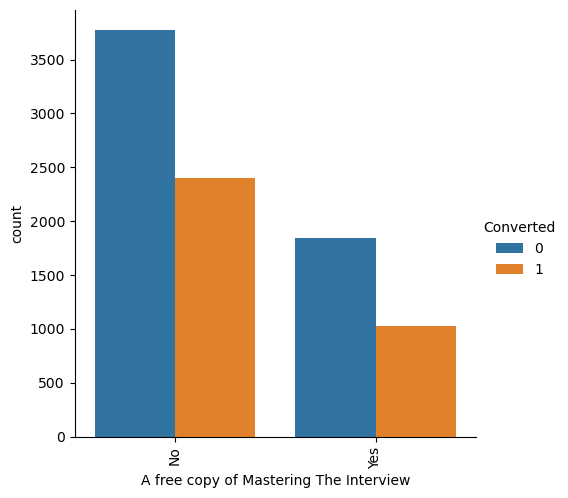

In [276]:
# Plotting count of converted vs. unconverted leads by City
sns.catplot(data=lead_data1, x='A free copy of Mastering The Interview', hue='Converted', kind='count')
plt.xticks(rotation=90)
plt.show()

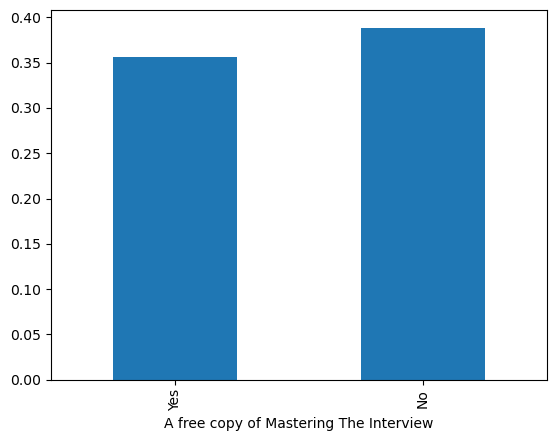

In [277]:
lead_data1.groupby(['A free copy of Mastering The Interview'])['Converted'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The leads who selected the option 'No' to 'A free copy of Mastering The Interview' showed higher lead conversion than those who selected 'Yes', though the difference between the two groups is marginal.

</div>

## Data Preparation

In [280]:
lead_data1.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      olark chat           No          0        0.000   
1  organic search           No          0        5.000   
2  direct traffic           No          1        2.000   
3  direct traffic           No          0        1.000   
4          google           No          1        2.000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                 0.000  Page Visited on Website   
1                          674                 2.500             Email Opened   
2                         1532                 2.000             Email Opened   
3                          305                 1.000              Unreachable   
4                         1428                 1.000        Converted to Lead   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [282]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_cat = pd.get_dummies(lead_data1[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Do Not Email','A free copy of Mastering The Interview']], dtype=int, drop_first=True)

# Adding the results to the master dataframe
lead_data1 = pd.concat([lead_data1, dummy_cat], axis=1)

In [283]:
lead_data1.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      olark chat           No          0        0.000   
1  organic search           No          0        5.000   
2  direct traffic           No          1        2.000   
3  direct traffic           No          0        1.000   
4          google           No          1        2.000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                 0.000  Page Visited on Website   
1                          674                 2.500             Email Opened   
2                         1532                 2.000             Email Opened   
3                          305                 1.000              Unreachable   
4                         1428                 1.000        Converted to Lead   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_direct traffic  Lead Source_facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_google  Lead Source_olark chat  Lead Source_organic search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_other_sources  Lead Source_reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_referral sites  Lead Source_welingak website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                       

#### Dropping the repeated variables

In [285]:
# We have created dummies for the below variables, so we can drop them
lead_data1 = lead_data1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Do Not Email','A free copy of Mastering The Interview'], axis=1)

In [286]:
lead_data1.head()

Prospect ID  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0        0.000   
1  2a272436-5132-4136-86fa-dcc88c88f482          0        5.000   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          1        2.000   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0        1.000   
4  3256f628-e534-4826-9d63-4a8b88782852          1        2.000   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                 0.000   
1                          674                 2.500   
2                         1532                 2.000   
3                          305                 1.000   
4                         1428                 1.000   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_direct traffic  Lead Source_facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_google  Lead Source_olark chat  Lead Source_organic search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_other_sources  Lead Source_reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_referral sites  Lead Source_welingak website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  Last Activity_Other activity  \
0                   

In [287]:
lead_data1.shape

(9038, 36)

In [288]:
lead_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9038 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9038 non-null   object 
 1   Converted                                             9038 non-null   int64  
 2   TotalVisits                                           9038 non-null   float64
 3   Total Time Spent on Website                           9038 non-null   int64  
 4   Page Views Per Visit                                  9038 non-null   float64
 5   Lead Origin_Landing Page Submission                   9038 non-null   int32  
 6   Lead Origin_Lead Add Form                             9038 non-null   int32  
 7   Lead Origin_Lead Import                               9038 non-null   int32  
 8   Lead Source_direct traffic                            9038 non-

## Test-Train Split

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
# Putting feature variable to X
X = lead_data1.drop(['Prospect ID','Converted'], axis=1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0        0.000                            0                 0.000   
1        5.000                          674                 2.500   
2        2.000                         1532                 2.000   
3        1.000                          305                 1.000   
4        2.000                         1428                 1.000   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_direct traffic  Lead Source_facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_google  Lead Source_olark chat  Lead Source_organic search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_other_sources  Lead Source_reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_referral sites  Lead Source_welingak website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  Last Activity_Other activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                       

In [292]:
# Putting response variable to y
y = lead_data1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [293]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [295]:
from sklearn.preprocessing import MinMaxScaler

In [296]:
# Apply scaler() to all the columns except the 'yes-no' and dummy variables
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4991        0.116                        0.443                 0.455   
7461        0.116                        0.055                 0.227   
8289        0.093                        0.011                 0.182   
8912        0.000                        0.000                 0.000   
8195        0.000                        0.000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4991                                    1                          0   
7461                                    1                          0   
8289                                    0                          0   
8912                                    0                          0   
8195                                    0                          0   

      Lead Origin_Lead Import  Lead Source_direct traffic  \
4991                        0                           1   
7461                        0                           0   
8289                        0                           0   
8912                        0                           0   
8195                        0                           0   

      Lead Source_facebook  Lead Source_google  Lead Source_olark chat  \
4991                     0                   0                       0   
7461                     0                   0                       0   
8289                     0                   1                       0   
8912                     0                   0                       1   
8195                     0                   0                       1   

      Lead Source_organic search  Lead Source_other_sources  \
4991                           0                          0   
7461                           1                          0   
8289                           0                          0   
8912                           0                          0   
8195                           0                          0   

      Lead Source_reference  Lead Source_referral sites  \
4991                      0                           0   
7461                      0                           0   
8289                      0                           0   
8912                      0                           0   
8195                      0                           0   

      Lead Source_welingak website  Last Activity_Email Bounced  \
4991                             0                            0   
7461                             0                            0   
8289                             0                            0   
8912                             0                            0   
8195                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4991                                 0                           0   
7461                                 0                           0   
8289                                 0                           1   
8912                                 0                           0   
8195                                 0                           0   

      Last Activity_Form Submitted on Website  \
4991                                        0   
7461                                        0   
8289                                        0   
8912                                        0   
8195                                        0   

      Last Activity_Had a Phone Conversation  \
4991                                       0   
7461                                       0   
8289                                       0   
8912                                       0   
8195                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_Other activity  \
4991                                      0                             0   
7461                            

In [297]:
# Checking the Lead Conversion Rate
Conversion = (sum(lead_data1['Converted'])/len(lead_data1['Converted'].index))*100
Conversion

37.862358928966586

<html><mark><b>The lead conversion rate is 37.86%</b></mark></html>

## Looking at Correlations

In [300]:
# Let's see the correlation matrix 
corr_mat=lead_data1.corr(numeric_only=True)
corr_mat

Converted  TotalVisits  \
Converted                                               1.000        0.046   
TotalVisits                                             0.046        1.000   
Total Time Spent on Website                             0.360        0.309   
Page Views Per Visit                                    0.002        0.650   
Lead Origin_Landing Page Submission                    -0.037        0.388   
Lead Origin_Lead Add Form                               0.301       -0.232   
Lead Origin_Lead Import                                -0.009       -0.052   
Lead Source_direct traffic                             -0.073        0.116   
Lead Source_facebook                                   -0.011       -0.051   
Lead Source_google                                      0.029        0.171   
Lead Source_olark chat                                 -0.124       -0.427   
Lead Source_organic search                             -0.002        0.270   
Lead Source_other_sources                               0.011        0.001   
Lead Source_reference                                   0.256       -0.202   
Lead Source_referral sites                             -0.030        0.065   
Lead Source_welingak website                            0.150       -0.110   
Last Activity_Email Bounced                            -0.128       -0.061   
Last Activity_Email Link Clicked                       -0.037       -0.028   
Last Activity_Email Opened                             -0.023        0.045   
Last Activity_Form Submitted on Website                -0.034        0.018   
Last Activity_Had a Phone Conversation                  0.046        0.028   
Last Activity_Olark Chat Conversation                  -0.209       -0.190   
Last Activity_Other activity                            0.024        0.018   
Last Activity_Page Visited on Website                  -0.080        0.245   
Last Activity_SMS Sent                                  0.336        0.008   
Last Activity_Unreachable                              -0.010        0.019   
Last Activity_Unsubscribed                             -0.026        0.006   
What is your current occupation_Housewife               0.040       -0.008   
What is your current occupation_Missing                -0.323       -0.075   
What is your current occupation_Other                   0.019        0.043   
What is your current occupation_Student                -0.006       -0.029   
What is your current occupation_Unemployed              0.128        0.075   
What is your current occupation_Working Profess...      0.317        0.000   
Do Not Email_Yes                                       -0.140        0.010   
A free copy of Mastering The Interview_Yes             -0.031        0.264   

                                                    Total Time Spent on Website  \
Converted                                                                 0.360   
TotalVisits                                                               0.309   
Total Time Spent on Website                                               1.000   
Page Views Per Visit                                                      0.341   
Lead Origin_Landing Page Submission                                       0.292   
Lead Origin_Lead Add Form                                                -0.189   
Lead Origin_Lead Import                                                  -0.051   
Lead Source_direct traffic                                                0.141   
Lead Source_facebook                                                     -0.050   
Lead Source_google                                                        0.217   
Lead Source_olark chat                                                   -0.379   
Lead Source_organic search                                                0.099   
Lead Source_other_sources                                                -0.001   
Lead Source_reference                                                    -0.163  

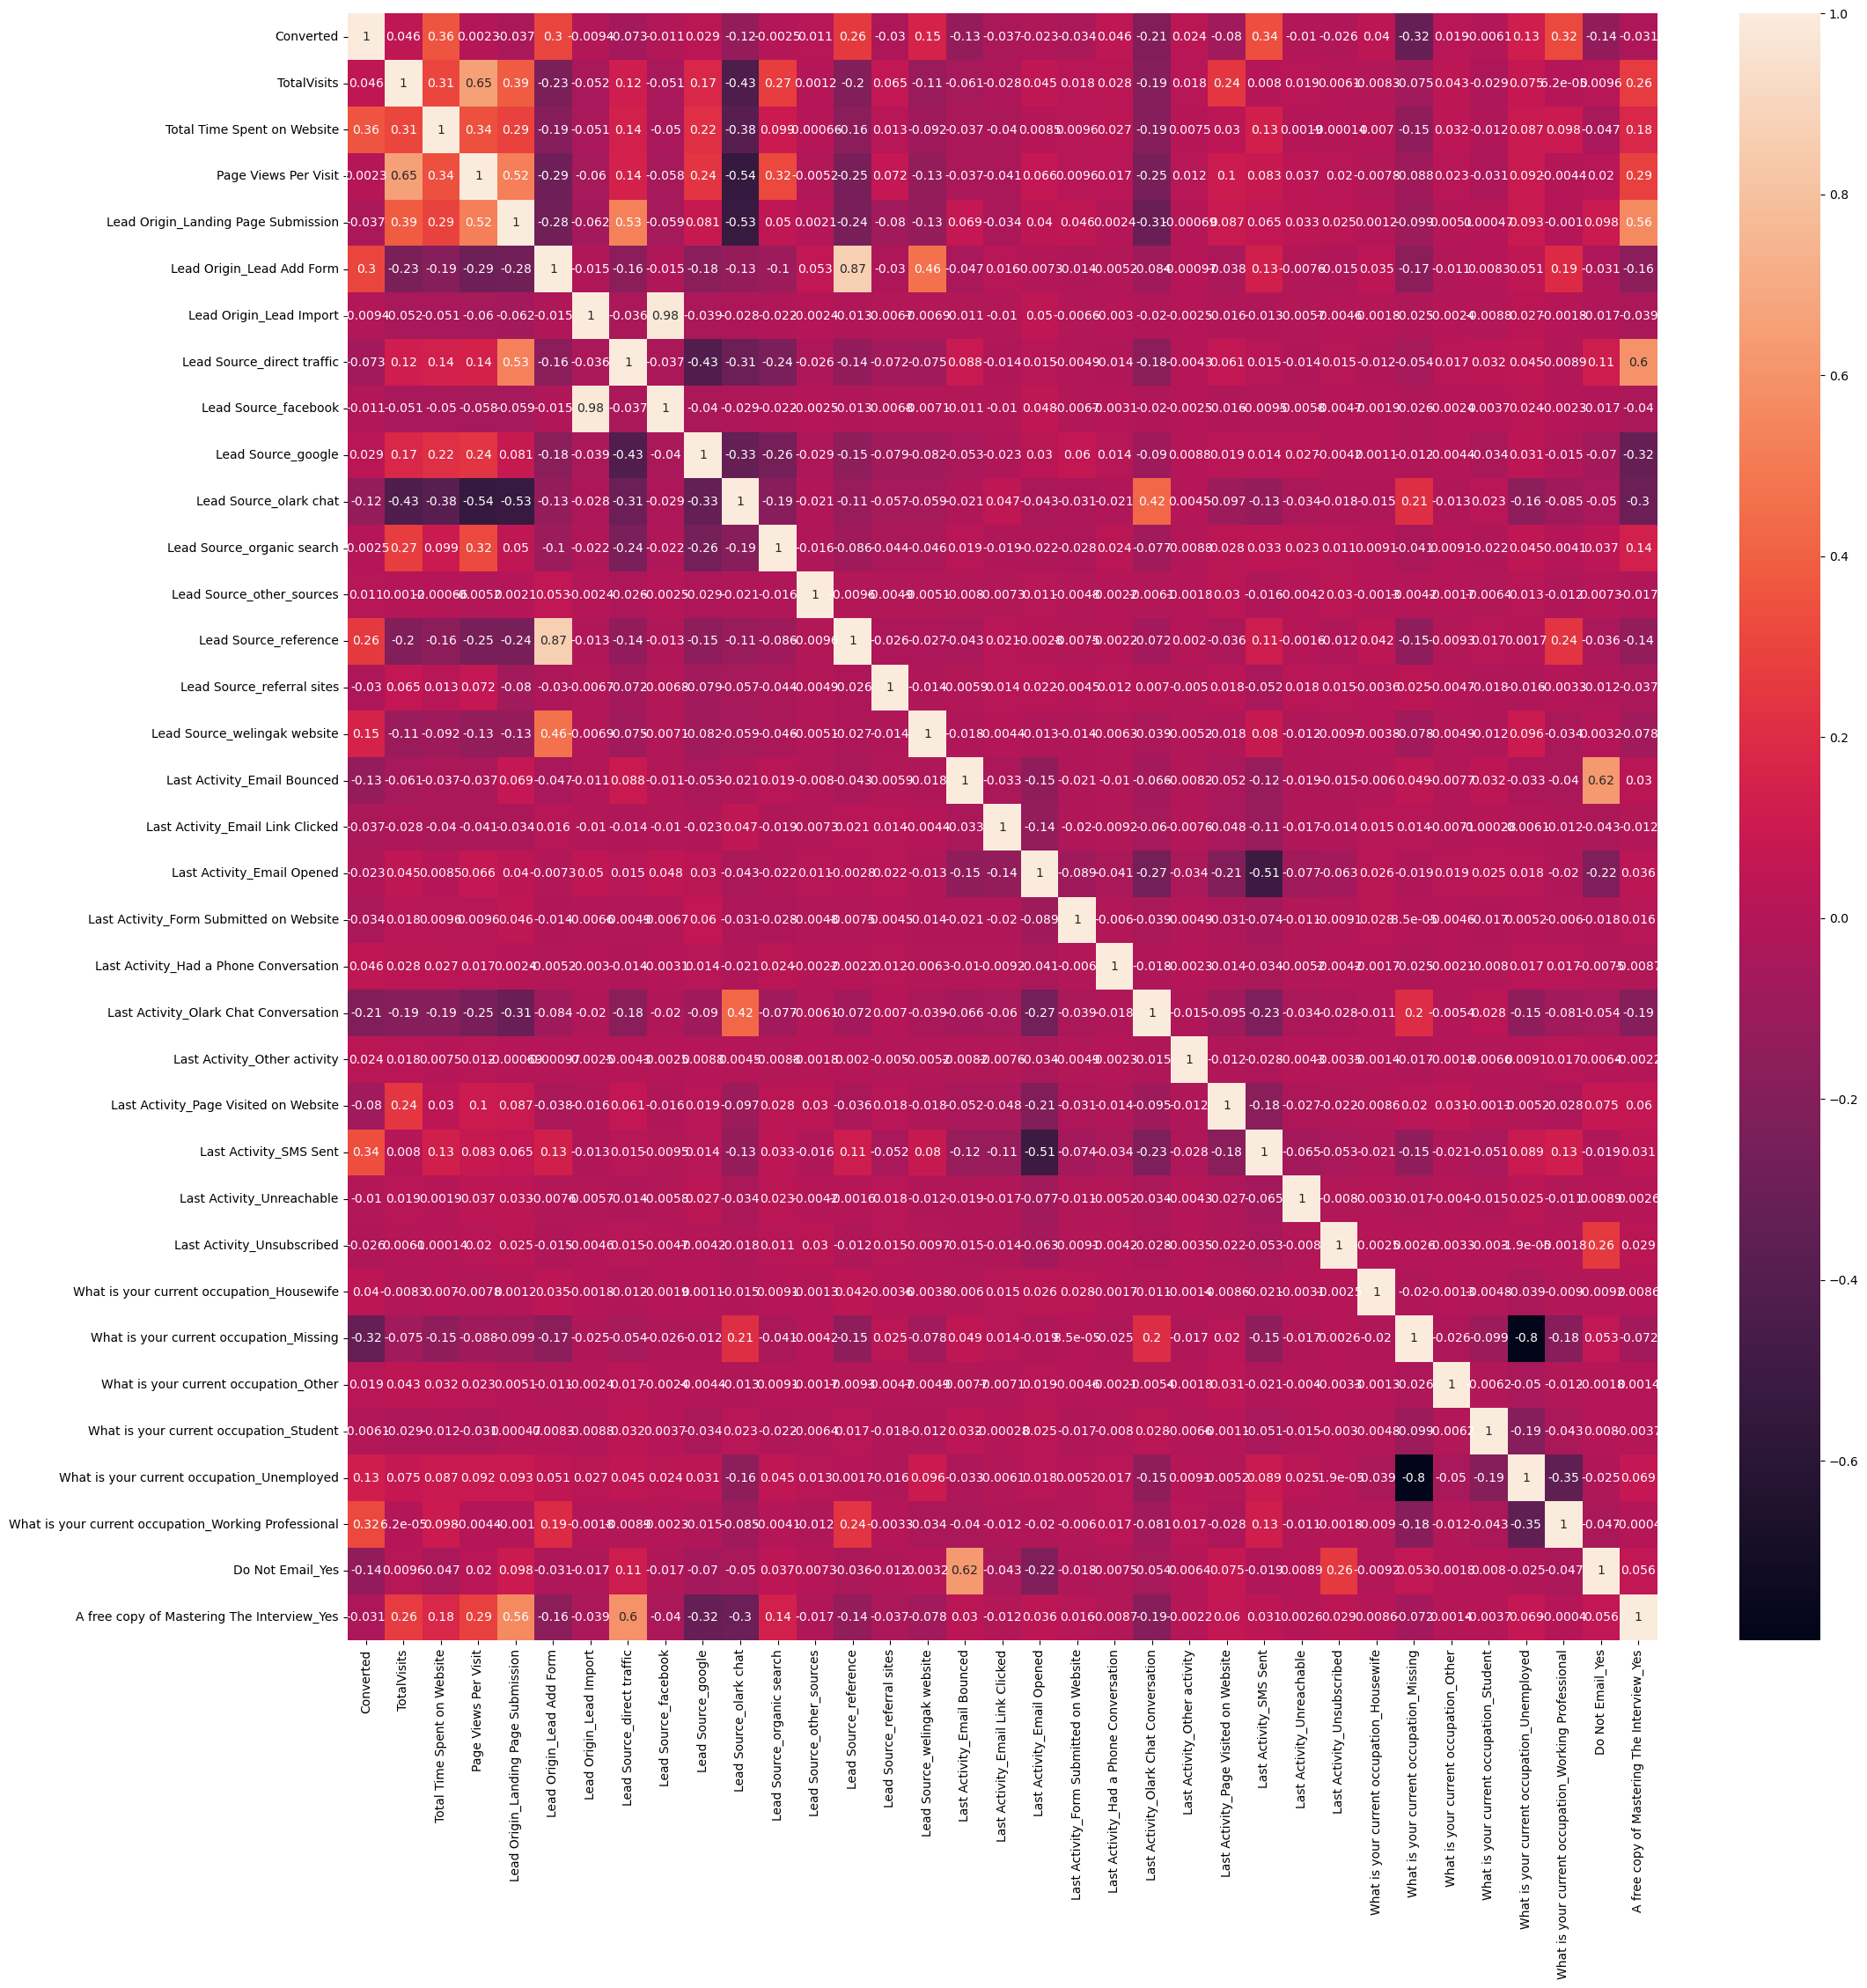

In [301]:
# Let's see the heatmap
plt.figure(figsize = (24,24))       
sns.heatmap(lead_data1.corr(numeric_only=True),annot = True)
plt.show()

# Model Building

## 1. Running First Training Model with all variables

In [304]:
import statsmodels.api as sm

In [305]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.astype('float64'))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6326
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.5
Date:                Tue, 21 Jan 2025   Deviance:                       5175.0
Time:                        20:53:11   Pearson chi2:                 6.36e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4007
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -22.9050   2.27e+04     -0.001      0.999   -4.44e+04    4.44e+04
TotalVisits                                              3.4261      0.568      6.036      0.000       2.314       4.539
Total Time Spent on Website                              4.4488      0.169     26.393      0.000       4.118       4.779
Page Views Per Visit                                    -1.0749      0.299     -3.592      0.000      -1.661      -0.488
Lead Origin_Landing Page Submission                     -0.2251      0.107     -2.112      0.035      -0.434      -0.016
Lead Origin_Lead Add Form                                1.0579      1.032      1.025      0.305      -0.965       3.081
Lead Origin_Lead Import                                 23.3098   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_direct traffic                              20.0893   2.27e+04      0.001      0.999   -4.44e+04    4.44e+04
Lead Source_facebook                                    -2.2311   5.33e+04  -4.19e-05      1.000   -1.04e+05    1.04e+05
Lead Source_google                                      20.3706   2.27e+04      0.001      0.999   -4.44e+04    4.44e+04
Lead Source_olark chat                                  21.3280   2.27e+04      0.001      0.999   -4.44e+04    4.44e+04
Lead Source_organic search                              20.1884   2.27e+04      0.001      0.999   -4.44e+04    4.44e+04
Lead Source_other_sources                               21.4310   2.27e+04      0.001      0.999   -4.44e+04    4.44e+04
Lead Source_reference                                   22.6833   2.27e+04      0.001      0.999   -4.44e+04    4.44e+04
Lead Source_referral sites                              20.0490   2.27e+04      0.001      0.999   -4.44e+04    4.44e+04
Lead Source_welingak website                            25.2077   2.27e+04      0.001      0.999   -4.44e+04    4.44e+04
Last Activity_Email Bounced                              0.0036      0.445      0.008      0.993      -0.869       0.877
Last Activity_Email Link Clicked                         0.7255      0.287      2.530      0.011       0.164       1.288
Last Activity_Email Opened                               1.0294      0.209      4.929      0.000       0.620       1.439
Last Activity_Form Submitted on Website                  0.0058      0.418      0.014      0.989      -0.814       0.826
Last Activity_Had a Phone Conversation                   2.9982      0.734      4.087      0.000       1.560       4.436
Last Activity_Olark Chat Conversation                   -0.4284      0.258     -1.661      0.097      -0.934       0.077
Last Activity_Other activity                             2

## Feature Selection Using RFE

In [307]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [308]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [309]:
rfe.support_

array([ True,  True, False, False,  True, False,  True, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
        True, False, False, False,  True,  True, False])

In [310]:
# List of features along with RFE support and ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 15),
 ('Lead Source_google', True, 1),
 ('Lead Source_olark chat', False, 12),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_other_sources', False, 18),
 ('Lead Source_reference', False, 8),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_welingak website', True, 1),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 17),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other activity', False, 2),
 ('Last Activity_Page Visited on Website', False

In [311]:
# Columns supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_organic search',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Missing',
       'What is your current occupation_Working Professional',
       'Do Not Email_Yes'],
      dtype='object')

In [312]:
# Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_facebook',
       'Lead Source_olark chat', 'Lead Source_other_sources',
       'Lead Source_reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Other activity', 'Last Activity_Page Visited on Website',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

### Assessing the model with StatsModels

#### 1. First iteration

In [315]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm.astype('float64'), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6326
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.4
Date:                Tue, 21 Jan 2025   Deviance:                       5266.8
Time:                        20:53:13   Pearson chi2:                 6.36e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3919
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8467      0.092     -9.224      0.000      -1.027      -0.667
TotalVisits                                              2.4860      0.482      5.157      0.000       1.541       3.431
Total Time Spent on Website                              4.4655      0.167     26.807      0.000       4.139       4.792
Lead Origin_Lead Add Form                                2.4365      0.238     10.236      0.000       1.970       2.903
Lead Source_direct traffic                              -1.6876      0.124    -13.606      0.000      -1.931      -1.444
Lead Source_google                                      -1.3518      0.121    -11.214      0.000      -1.588      -1.116
Lead Source_organic search                              -1.5810      0.147    -10.734      0.000      -1.870      -1.292
Lead Source_referral sites                              -1.6236      0.331     -4.906      0.000      -2.272      -0.975
Lead Source_welingak website                             2.4932      1.034      2.412      0.016       0.467       4.519
Last Activity_Had a Phone Conversation                   2.1523      0.698      3.084      0.002       0.785       3.520
Last Activity_Olark Chat Conversation                   -1.2571      0.163     -7.724      0.000      -1.576      -0.938
Last Activity_SMS Sent                                   1.2737      0.074     17.157      0.000       1.128       1.419
What is your current occupation_Housewife               23.0995   1.59e+04      0.001      0.999   -3.11e+04    3.12e+04
What is your current occupation_Missing                 -1.1806      0.087    -13.597      0.000      -1.351      -1.010
What is your current occupation_Working Professional     2.5062      0.183     13.660      0.000       2.147       2.866
Do Not Email_Yes                                        -1.3334      0.166     -8.039      0.000      -1.658      -1.008
========================================================================================================================
"""

### Checking VIFs

In [317]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [318]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype('float64').values, i) for i in range(X_train[col].astype('float64').shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                         TotalVisits 2.800
4                                  Lead Source_google 2.430
1                         Total Time Spent on Website 2.370
3                          Lead Source_direct traffic 2.150
5                          Lead Source_organic search 1.790
2                           Lead Origin_Lead Add Form 1.500
10                             Last Activity_SMS Sent 1.500
12            What is your current occupation_Missing 1.410
7                        Lead Source_welingak website 1.330
13  What is your current occupation_Working Profes... 1.200
9               Last Activity_Olark Chat Conversation 1.150
14                                   Do Not Email_Yes 1.110
6                          Lead Source_referral sites 1.080
8              Last Activity_Had a Phone Conversation 1.010
11          What is your current occupation_Housewife 1.000

In [319]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype('float64'))
y_train_pred[:10]

4991   0.732
7461   0.142
8289   0.128
8912   0.036
8195   0.605
7646   0.420
5527   0.036
5801   0.995
4747   0.010
7944   0.091
dtype: float64

In [320]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73217804, 0.14161921, 0.12829439, 0.0361107 , 0.60514919,
       0.41976096, 0.0361107 , 0.9953659 , 0.01023006, 0.09090657])

#### Creating a dataframe with the actual conversion flag (given in the input data) and the predicted probabilities(from the model)

In [322]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID
0          0            0.732         4991
1          0            0.142         7461
2          0            0.128         8289
3          0            0.036         8912
4          0            0.605         8195

#### **Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0**

Since the logistic curve gives you just the probabilities and not the actual classification of 'Converted' and 'Not-Converted', you need to find a threshold probability to classify customers as 'Converted' and 'Not-Converted'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer converting is less than 0.5, you'd classify it as 'Not-Converted' and if it's greater than 0.5, you'd classify it as 'Converted'. The choice of 0.5 is completely arbitrary at this stage and you'll learn how to find the optimal cutoff in 'Model Evaluation', but for now, we'll move forward with 0.5 as the cutoff.

In [324]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  predicted
0          0            0.732         4991          1
1          0            0.142         7461          0
2          0            0.128         8289          0
3          0            0.036         8912          0
4          0            0.605         8195          1

In [325]:
from sklearn import metrics

In [326]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3454  456]
 [ 746 1670]]


In [327]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8099905153335442


In [328]:
# Dropping variable with p value more than 0.05: What is your current occupation_Housewife	
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_organic search',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Missing',
       'What is your current occupation_Working Professional',
       'Do Not Email_Yes'],
      dtype='object')

#### 2. Second iteration

In [330]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm.astype('float64'), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6326
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.6
Date:                Tue, 21 Jan 2025   Deviance:                       5279.2
Time:                        20:53:13   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8417      0.092     -9.177      0.000      -1.022      -0.662
TotalVisits                                              2.4523      0.482      5.092      0.000       1.508       3.396
Total Time Spent on Website                              4.4622      0.166     26.813      0.000       4.136       4.788
Lead Origin_Lead Add Form                                2.4496      0.238     10.302      0.000       1.984       2.916
Lead Source_direct traffic                              -1.6812      0.124    -13.571      0.000      -1.924      -1.438
Lead Source_google                                      -1.3439      0.120    -11.163      0.000      -1.580      -1.108
Lead Source_organic search                              -1.5651      0.147    -10.648      0.000      -1.853      -1.277
Lead Source_referral sites                              -1.6202      0.331     -4.897      0.000      -2.269      -0.972
Lead Source_welingak website                             2.4789      1.034      2.398      0.016       0.453       4.505
Last Activity_Had a Phone Conversation                   2.1438      0.698      3.072      0.002       0.776       3.511
Last Activity_Olark Chat Conversation                   -1.2614      0.163     -7.753      0.000      -1.580      -0.943
Last Activity_SMS Sent                                   1.2661      0.074     17.073      0.000       1.121       1.411
What is your current occupation_Missing                 -1.1849      0.087    -13.655      0.000      -1.355      -1.015
What is your current occupation_Working Professional     2.4996      0.183     13.628      0.000       2.140       2.859
Do Not Email_Yes                                        -1.3372      0.166     -8.065      0.000      -1.662      -1.012
========================================================================================================================
"""

In [331]:
y_train_pred = res.predict(X_train_sm.astype('float64')).values.reshape(-1)

In [332]:
y_train_pred[:10]

array([0.7318534 , 0.14221   , 0.12938019, 0.03598219, 0.60451844,
       0.41978044, 0.03598219, 0.99538362, 0.01023608, 0.09069578])

In [333]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [334]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  predicted
0          0            0.732         4991          1
1          0            0.142         7461          0
2          0            0.129         8289          0
3          0            0.036         8912          0
4          0            0.605         8195          1

In [335]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8096743597850142


<html><mark><b>So overall the accuracy has not dropped much.</b></mark></html>

### Checking the VIFs again

In [338]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype('float64').values, i) for i in range(X_train[col].astype('float64').shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                         TotalVisits 2.800
4                                  Lead Source_google 2.420
1                         Total Time Spent on Website 2.370
3                          Lead Source_direct traffic 2.150
5                          Lead Source_organic search 1.790
2                           Lead Origin_Lead Add Form 1.500
10                             Last Activity_SMS Sent 1.500
11            What is your current occupation_Missing 1.410
7                        Lead Source_welingak website 1.330
12  What is your current occupation_Working Profes... 1.200
9               Last Activity_Olark Chat Conversation 1.150
13                                   Do Not Email_Yes 1.110
6                          Lead Source_referral sites 1.080
8              Last Activity_Had a Phone Conversation 1.010

<html><mark><b>As all variables have low p-value and good VIFs, we can move forward with making predictions with this model.</b></mark></html>

In [340]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3453,  457],
       [ 747, 1669]], dtype=int64)

## Looking at Other Metrics Besides Accuracy

In [342]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [343]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6908112582781457

In [344]:
# Let us calculate specificity
TN / float(TN+FP)

0.8831202046035805

In [345]:
# Calculate false positive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.11687979539641943


In [346]:
# positive predictive value 
print (TP / float(TP+FP))

0.7850423330197555


In [347]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8221428571428572


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [350]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [351]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

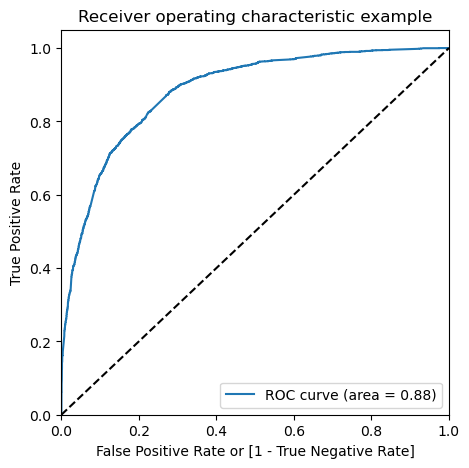

In [352]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<html><mark><b>The ROC Curve area is 0.88 which indicates the robustness of the model.</b></mark></html>

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [356]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  \
0          0            0.732         4991          1    1    1    1    1   
1          0            0.142         7461          0    1    1    0    0   
2          0            0.129         8289          0    1    1    0    0   
3          0            0.036         8912          0    1    0    0    0   
4          0            0.605         8195          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    1    1    1    0    0    0

In [357]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.382  1.000  0.000
0.100 0.100     0.583  0.979  0.338
0.200 0.200     0.753  0.919  0.650
0.300 0.300     0.784  0.869  0.731
0.400 0.400     0.806  0.760  0.835
0.500 0.500     0.810  0.691  0.883
0.600 0.600     0.799  0.610  0.916
0.700 0.700     0.774  0.494  0.947
0.800 0.800     0.754  0.411  0.966
0.900 0.900     0.710  0.259  0.988


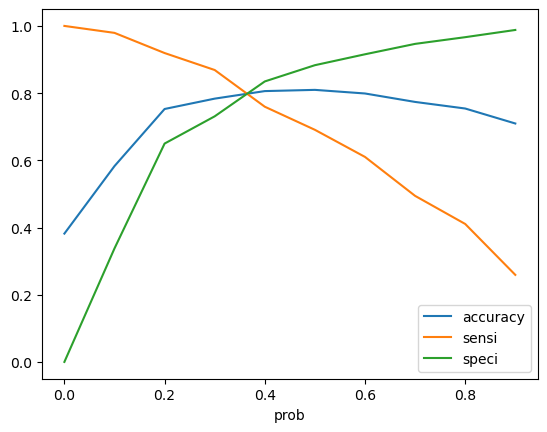

In [358]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<html><mark><b> From the curve above, 0.35 is the optimum cutoff point to divide the probabilities of converted and unconverted leads. </b></mark></html>

In [360]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  \
0          0            0.732         4991          1    1    1    1    1   
1          0            0.142         7461          0    1    1    0    0   
2          0            0.129         8289          0    1    1    0    0   
3          0            0.036         8912          0    1    0    0    0   
4          0            0.605         8195          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    0    0                1  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    0    0    0    0    0    0                0  
4    1    1    1    0    0    0                1

In [361]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7978185267151439

In [362]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3132,  778],
       [ 501, 1915]], dtype=int64)

In [363]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [364]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7926324503311258

In [365]:
# Let us calculate specificity
TN / float(TN+FP)

0.8010230179028133

In [366]:
# Calculate false postive rate - predicting conversion when customer have not converted
print(FP/ float(TN+FP))

0.1989769820971867


In [367]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7111028592647605


In [368]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8620974401321222


## Precision and Recall

In [370]:
# Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3453,  457],
       [ 747, 1669]], dtype=int64)

##### Precision
TP / TP + FP

In [372]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7850423330197555

In [373]:
from sklearn.metrics import precision_score, recall_score

In [374]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7850423330197555

In [375]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6908112582781457

### Precision and recall tradeoff

In [377]:
from sklearn.metrics import precision_recall_curve

In [378]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6321    1
 6322    0
 6323    0
 6324    1
 6325    1
 Name: Converted, Length: 6326, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6321    1
 6322    0
 6323    0
 6324    1
 6325    0
 Name: predicted, Length: 6326, dtype: int64)

In [379]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

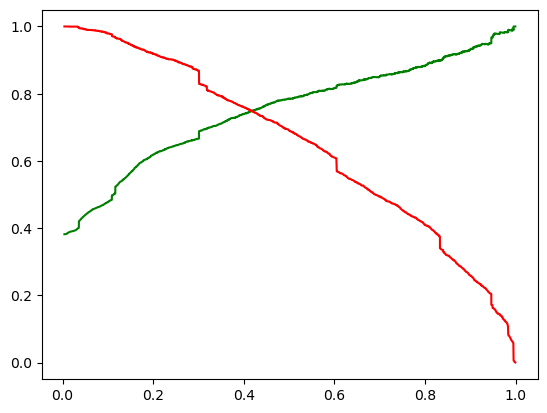

In [380]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [382]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [383]:
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5150        0.047                        0.004                          0   
3799        0.093                        0.033                          0   
3588        0.070                        0.048                          0   
6447        0.070                        0.107                          0   
565         0.209                        0.391                          0   

      Lead Source_direct traffic  Lead Source_google  \
5150                           0                   1   
3799                           0                   1   
3588                           0                   1   
6447                           0                   0   
565                            0                   1   

      Lead Source_organic search  Lead Source_referral sites  \
5150                           0                           0   
3799                           0                           0   
3588                           0                           0   
6447                           1                           0   
565                            0                           0   

      Lead Source_welingak website  Last Activity_Had a Phone Conversation  \
5150                             0                                       0   
3799                             0                                       0   
3588                             0                                       0   
6447                             0                                       0   
565                              0                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
5150                                      0                       1   
3799                                      0                       0   
3588                                      1                       0   
6447                                      0                       0   
565                                       0                       0   

      What is your current occupation_Missing  \
5150                                        0   
3799                                        1   
3588                                        1   
6447                                        0   
565                                         0   

      What is your current occupation_Working Professional  Do Not Email_Yes  
5150                                                  0                    0  
3799                                                  0                    0  
3588                                                  0                    0  
6447                                                  0                    1  
565                                                   0                    0

In [384]:
X_test_sm = sm.add_constant(X_test)

## **Making predictions on the test set**

In [386]:
y_test_pred = res.predict(X_test_sm.astype('float64'))

In [387]:
y_test_pred[:10]

5150   0.313
3799   0.048
3588   0.014
6447   0.043
565    0.518
4125   0.911
4941   0.973
1847   0.067
6499   0.918
2203   0.441
dtype: float64

In [388]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [389]:
# Let's see the head
y_pred_1.head()

0
5150 0.313
3799 0.048
3588 0.014
6447 0.043
565  0.518

In [390]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [391]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [392]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [393]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [394]:
y_pred_final.head()

Converted  Prospect ID     0
0          0         5150 0.313
1          0         3799 0.048
2          0         3588 0.014
3          0         6447 0.043
4          1          565 0.518

In [395]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [396]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [397]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob
0         5150          0            0.313
1         3799          0            0.048
2         3588          0            0.014
3         6447          0            0.043
4          565          1            0.518

## Using the probability cutoff of 0.35 based on the Accuracy-Sensitivity-Specificity tradeoff curve 

In [399]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [400]:
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob  final_predicted
0         5150          0            0.313                0
1         3799          0            0.048                0
2         3588          0            0.014                0
3         6447          0            0.043                0
4          565          1            0.518                1

In [401]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8185840707964602

In [402]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1418,  288],
       [ 204,  802]], dtype=int64)

In [403]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [404]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7972166998011928

In [405]:
# Let us calculate specificity
TN / float(TN+FP)

0.8311840562719812

In [406]:
# Let us calculate precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7357798165137615

In [407]:
# Let us calculate recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7972166998011928

## Using the probability cutoff of 0.41 based on the precision-recall tradeoff curve 

In [409]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [410]:
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob  final_predicted
0         5150          0            0.313                0
1         3799          0            0.048                0
2         3588          0            0.014                0
3         6447          0            0.043                0
4          565          1            0.518                1

In [411]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.823377581120944

In [412]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1468,  238],
       [ 241,  765]], dtype=int64)

In [413]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [414]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7604373757455268

In [415]:
# Let us calculate specificity
TN / float(TN+FP)

0.8604923798358733

In [416]:
# Let us calculate precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7627118644067796

In [417]:
# Let us calculate recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7604373757455268

## Variables in the model which contribute most towards the probability of a lead getting converted¶

In [419]:
res.params.sort_values(ascending=False)

Total Time Spent on Website                             4.462
What is your current occupation_Working Professional    2.500
Lead Source_welingak website                            2.479
TotalVisits                                             2.452
Lead Origin_Lead Add Form                               2.450
Last Activity_Had a Phone Conversation                  2.144
Last Activity_SMS Sent                                  1.266
const                                                  -0.842
What is your current occupation_Missing                -1.185
Last Activity_Olark Chat Conversation                  -1.261
Do Not Email_Yes                                       -1.337
Lead Source_google                                     -1.344
Lead Source_organic search                             -1.565
Lead Source_referral sites                             -1.620
Lead Source_direct traffic                             -1.681
dtype: float64

## Conversion Percentage Probabilities 

In [705]:
y_pred_final['Conversion Percentage Probabilities'] = y_pred_final.Conversion_Prob.apply({lambda x:x*100})

In [707]:
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob  final_predicted  \
0         5150          0            0.313                0   
1         3799          0            0.048                0   
2         3588          0            0.014                0   
3         6447          0            0.043                0   
4          565          1            0.518                1   

   Conversion Percentage Probabilities  
0                               31.306  
1                                4.773  
2                                1.414  
3                                4.336  
4                               51.790

## Hot Leads

In [712]:
y_pred_final[y_pred_final['Conversion Percentage Probabilities']>=80]

Prospect ID  Converted  Conversion_Prob  final_predicted  \
5            4125          1            0.911                1   
6            4941          1            0.973                1   
8            6499          1            0.918                1   
10           2166          1            0.861                1   
12            392          1            0.966                1   
...           ...        ...              ...              ...   
2689         4005          1            0.972                1   
2690         1618          0            0.995                1   
2702         6127          1            0.833                1   
2705         8330          1            0.922                1   
2708         4081          1            0.954                1   

      Conversion Percentage Probabilities  
5                                  91.103  
6                                  97.338  
8                                  91.785  
10                                 86.062  
12                                 96.639  
...                                   ...  
2689                               97.158  
2690                               99.529  
2702                               83.311  
2705                               92.192  
2708                               95.435  

[476 rows x 5 columns]